In [1]:
import numpy as np
import math
import cmath
import time
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, Image


from scipy.linalg import eigh
from scipy.linalg import expm, dft, logm
from scipy.optimize import least_squares
from scipy.optimize import minimize

In [2]:
length=np.linspace(0.0,5.0,10001)
np.set_printoptions(linewidth=200)
np.set_printoptions(precision=17)
np.set_printoptions(legacy='1.25')
#np.set_printoptions(suppress=True, precision=8)

In [3]:
M=5
for m in range(M):
    print("m-n=",end='')
    for n in range(M):
        print(f'{m-n}, ',end='')
    print("\n")

m-n=0, -1, -2, -3, -4, 

m-n=1, 0, -1, -2, -3, 

m-n=2, 1, 0, -1, -2, 

m-n=3, 2, 1, 0, -1, 

m-n=4, 3, 2, 1, 0, 



In [10]:
x=2.0*np.pi/9.0
U=expm(-1j*np.array([[0,x,x],[x,0,x],[x,x,0]]))
print(1/np.sqrt(3.0),"\n",np.abs(U),"\n")
print(np.angle(U) ,"\n")

#fase_in=np.diag([])

0.5773502691896258 
 [[0.5773502691896257 0.5773502691896258 0.5773502691896258]
 [0.5773502691896257 0.5773502691896257 0.5773502691896258]
 [0.5773502691896255 0.5773502691896255 0.5773502691896257]] 

[[ 0.17453292519943292 -1.9198621771937625  -1.9198621771937625 ]
 [-1.9198621771937625   0.1745329251994329  -1.9198621771937625 ]
 [-1.9198621771937625  -1.9198621771937625   0.17453292519943295]]


In [11]:
print(1*np.pi/3)
print(2*np.pi/3)
print(4*np.pi/3)

1.0471975511965976
2.0943951023931953
4.1887902047863905


In [83]:
def F3(vec):
    #t,C12,C22,C33 = vec
    t,C12,C23,C11= vec
    C = np.array([
        [ 0 , C12,  0 ],
        [C12, C11, C23],
        [ 0 , C23, 0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/3
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[1,1],exp_C[1,2],exp_C[2,2]])

In [84]:
for n in range(100):
    guess = np.random.uniform(low=0.01, high=3, size=4)
    guess[0]=1
    result = least_squares(fun=F3,x0=guess,method='trf',bounds=(1e-2,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}')
    if result.success and result.optimality<1e-14:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))

step 0,   Opt->1e-15
Solution = [1.1883107640491744, 1.0900477253633614, 1.0900477253633618, 1.4347679636892618]
Optimality= 2.1513333664907333e-15
guess= [1.0, 1.5522069706541315, 0.7043412741762702, 1.7681882115922838]
step 1,   Opt->1e-16
Solution = [0.8491419282749095, 1.5254404502297085, 1.5254404502297085, 2.00785070009273]
Optimality= 8.805070793457706e-16
guess= [1.0, 0.4544326862921389, 2.0458012045137854, 1.4675724051823813]
step 2,   Opt->1e-9
step 3,   Opt->1e-15
Solution = [0.681758511237359, 1.899962265268483, 1.8999622652684836, 2.500812512146663]
Optimality= 1.0019018149402026e-15
guess= [1.0, 2.7838988551913557, 0.43128819924865086, 0.6418827402307685]
step 4,   Opt->1e-15
Solution = [1.0417194768203342, 1.2434397879651093, 1.2434397879651096, 1.636669231114819]
Optimality= 1.079546233874551e-15
guess= [1.0, 0.3516345220441141, 0.9013031351786457, 2.131922128877121]
step 5,   Opt->1e-15
Solution = [1.0995415066237695, 1.178050521579645, 1.178050521579646, 1.55060105043

In [69]:
Solution = [1.3002771389148073, 1.3750843651865545, 0.8383328524485424, 1.6705325892254657]
print(np.dot(F3(Solution),F3(Solution)))

1.6640034719505718e-31


In [33]:
#t,C12,C22,C33 = vec
#Solution = [2.5468792193446155, 1.9460009738936836, 1.34587029598301, 1.34587029598301]
#Optimality= 1.1025890483090593e-15
#guess= [1.0, 0.05430878169249308, 0.7494588451158496, 0.8069251896319476]

#Solution = [1.0012949442177577, 2.8217097584178736, 2.663757855790541, 2.663757855790542]
#Optimality= 2.5787770801575393e-15
#guess= [1.0, 2.907724205631842, 1.1280736055171772, 1.0053731395422056]

#Solution = [2.8424064253131474, 2.48827441335766, 1.3244073001155727, 1.3244073001155734]
#Optimality= 8.603389077217435e-15
#guess= [1.0, 0.034421068096595724, 2.752670779444435, 1.6507633640371757]

#t0,C12,C22,C33 =  Solution
#C = np.array([
#    [ 0 , C12, C12],
#    [C12, C22, C12],
#    [C12, C12, C33]
#])

#--------------------------------------------------------------------------------------------------
#t,C12,C13,C23,C11 = Solution
#Solution = [0.9960942385862419, 1.510724462044188, 1.5107244620441889, 1.1122921520855455, 0.3376324114508018]
#Optimality= 1.5881745184050622e-15
#guess= [1.0, 1.714223327846697, 0.5644232831633276, 1.0884697600958009, 0.5956320679230417]

#t0,C12,C13,C23,C11 =  Solution
#C = np.array([
#    [C11, C12, C12],
#    [C12,  0 , C23],
#    [C12, C23,  0 ]
#])

#------------------------------------------------------------------------------------------------------------------

Solution = [1.1883107640491744, 1.0900477253633614, 1.0900477253633618, 1.4347679636892618]
#guess= [1.0, 1.5522069706541315, 0.7043412741762702, 1.7681882115922838]

#print(fr"\theta={1.1883107640491744*1.0900477253633614}", rf"\beta={1.1883107640491744*1.4347679636892618}")
t0,C12,C23,C22 = Solution
C = np.array([
    [ 0 , C12,  0 ],
    [C12, C22, C23],
    [ 0 , C23,  0 ]
])

eigenvalues, eigenvectors = np.linalg.eigh(C)

exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t0)) @ eigenvectors.conj().T
fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

exp_C=fase_out@exp_C@fase_in
print(np.abs(exp_C),"\n")
print(np.angle(exp_C),"\n \n",np.angle(dft(3)),"\n")

print("fase in : ", np.angle(fase_in[0,0]), np.angle(fase_in[1,1]), np.angle(fase_in[2,2]))
print("fase out: ", np.angle(fase_out[0,0]), np.angle(fase_out[1,1]),np.angle(fase_out[2,2]))

A_11,A_12,A_13 =[],[],[]
A_22,A_23 =[],[]
A_33 =[]

A11,A12,A22,A23=[],[],[],[]
for t in length:
    exp_C= eigenvectors @ np.diag(np.exp(-1j*eigenvalues*t)) @ eigenvectors.conj().T
    
    A_11.append(np.abs(exp_C[0,0]))
    A_12.append(np.abs(exp_C[0,1]))
    A_13.append(np.abs(exp_C[0,2]))

    A_22.append(np.abs(exp_C[1,1]))
    A_23.append(np.abs(exp_C[1,2]))

    A_33.append(np.abs(exp_C[2,2]))

    #R=np.sqrt(C22**2+2*C22*C12+9*C12**2)
    #A11.append(np.abs(np.cos(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))+1j*(C22+C12)*np.sin(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))/np.sqrt(C22**2+2*C22*C12+9*C12**2) ))
    #A22.append(0.5*np.abs(np.exp(1j*3*C12*t/2)+np.exp(1j*C22*t/2)*( np.cos(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))-1j*(C12+C22)*np.sin(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))/np.sqrt(C22**2+2*C22*C12+9*C12**2)   )))

    #A12.append(2*C12*np.abs(np.sin(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))/np.sqrt(C22**2+2*C22*C12+9*C12**2)))
    #A23.append(0.5*np.abs(np.exp(1j*3*C12*t/2)-np.exp(1j*C22*t/2)*( np.cos(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))-1j*(C12+C22)*np.sin(t*0.5*np.sqrt(C22**2+2*C22*C12+9*C12**2))/np.sqrt(C22**2+2*C22*C12+9*C12**2)   )))
    

[[0.5773502691896254 0.577350269189626  0.5773502691896257]
 [0.5773502691896261 0.5773502691896253 0.5773502691896263]
 [0.5773502691896256 0.5773502691896261 0.5773502691896255]] 

[[ 9.6148134319178252e-17 -9.6148134319178166e-17 -9.6148134319178203e-17]
 [-1.9229626863835628e-16  2.0943951023931944e+00 -2.0943951023931975e+00]
 [-1.4422220147876732e-16 -2.0943951023931970e+00  2.0943951023931930e+00]] 
 
 [[ 0.                  0.                  0.                ]
 [ 0.                 -2.0943951023931953  2.0943951023931957]
 [ 0.                  2.094395102393196  -2.0943951023931944]] 

fase in :  -0.5235987755982979 2.4232714343773294 -2.6179938779914953
fase out:  0.0 2.946870209975627 -2.0943951023931975


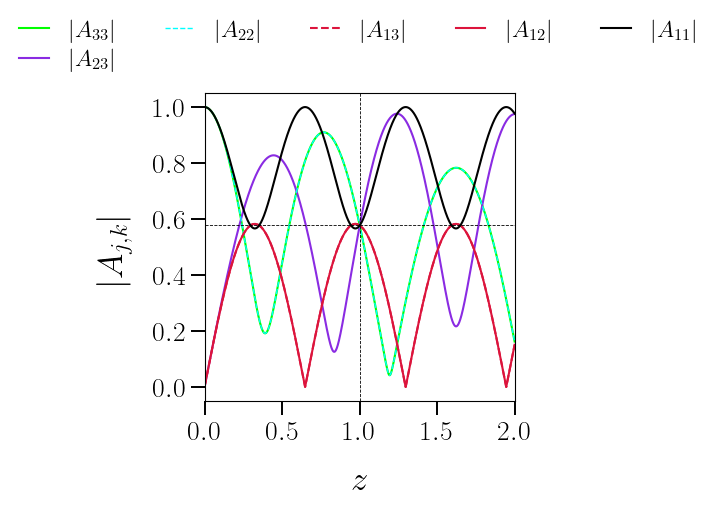

In [105]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.latex.preamble'] = r'\usepackage{braket}'
plt.rcParams['font.family'] = 'sans-serif'

#plt.plot(length,A11,color='yellow',lw=4.5,label='$|A_{11}|$')
#plt.plot(length,A12,color='yellow',lw=4.5,label='$|A_{12}|$')
#plt.plot(length,A22,color='yellow',ls='dashed',lw=4.5,label='$|A_{22}|$')
#plt.plot(length,A23,color='yellow',ls='dashed',lw=4.5,label='$|A_{23}|$')

plt.plot(length,A_33,color='lime',lw=1.5,label='$|A_{33}|$')
plt.plot(length,A_23,color='blueviolet',lw=1.5, label='$|A_{23}|$')
plt.plot(length,A_22,color='cyan',ls='dashed',lw=1.0,label='$|A_{22}|$')

plt.plot(length,A_13,color='crimson',ls='dashed',lw=1.5,label='$|A_{13}|$')
plt.plot(length,A_12,color='crimson',lw=1.5,label='$|A_{12}|$')
plt.plot(length,A_11,color='black',lw=1.5,label='$|A_{11}|$')


plt.axhline(y=1.0/np.sqrt(3.0), color='black', ls='dashed', lw=0.6)
plt.axvline(x=t0, color='black', lw=0.6, ls='dashed')

plt.xlabel(r"$ z$", fontsize=25, labelpad=15)
plt.ylabel('$|A_{j,k}|$ ', fontsize=25, labelpad=15)
plt.xticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,2])

plt.tick_params(axis='x', direction='out', length=10, width=1.4)
plt.tick_params(axis='y', direction='out', length=10, width=1.4)

#plt.text(0.64,0.85,s=r"$ t_0 = \pi/4$",ha="center", va="center",fontsize=17)
#plt.text(0.25,0.63,s=r"$ 1/\sqrt{3} $",ha="center", va="center",fontsize=17)

plt.legend(loc='lower center',fontsize=17,handlelength=1.25,handletextpad=0.9,labelspacing=0.25,ncol=5,markerscale=1.0,bbox_to_anchor=(0.5, 1),frameon=False)
#plt.savefig('CHT4_evolution2.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
def Angles_F5(vec):
    t, C12, C13 = vec
    C = np.array([
        [ 0 , C12, C13, C13, C12],
        [C12,  0 , C12, C13, C13],
        [C13, C12,  0 , C12, C13],
        [C13, C13, C12,  0 , C12],
        [C12, C13, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]
    
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    
    return np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1])) - np.sort(np.abs(np.angle(dft(M))[:,1])))

In [5]:
def F5(vec):
    t, C12, C13 = vec
    C = np.array([
        [ 0 , C12, C13, C13, C12],
        [C12,  0 , C12, C13, C13],
        [C13, C12,  0 , C12, C13],
        [C13, C13, C12,  0 , C12],
        [C12, C13, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C) 
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2 - 1.0/5.0
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2]])

In [20]:
for n in range(100):
    guess = np.random.uniform(low=0.01, high=3, size=3)
    guess[0]=1
    result = least_squares(fun=F5,x0=guess,method='trf',bounds=(1e-10,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F5(result.x))
    if result.success and result.optimality<1e-14 and Angles_F5(result.x)<1e-6:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F5(result.x),"\n")
        Bla=[result.x[1],result.x[2]]
        Bla=np.sort(Bla)
        print(Bla[1]/Bla[0])

step 0,   Opt->1e-15 2.512932857498226e-14
Solution = [1.0681997483032342, 1.5015571810984194, 2.0276621341991254]
Optimality= 6.464679956197661e-15
guess= [1.0, 1.1420582290901873, 2.19132402208433]
Angle= 2.512932857498226e-14 

1.3503729060226994
step 1,   Opt->1e-16 3.1086244689504383e-15
Solution = [1.0869957585478474, 1.6730720663976932, 0.6390566637358979]
Optimality= 9.58993097898003e-16
guess= [1.0, 1.7011107143153468, 0.4245663296728678]
Angle= 3.1086244689504383e-15 

2.6180339887498953
step 2,   Opt->1e-15 1.7199501139797033e-15
Solution = [1.0666541850122098, 2.5574674512222884, 0.9768656412453508]
Optimality= 4.486040712133518e-15
guess= [1.0, 1.2583031355739622, 1.1347920916291796]
Angle= 1.7199501139797033e-15 

2.6180339887498936
step 3,   Opt->1e-15 3.774758283725532e-15
Solution = [0.9817917949783223, 1.8523502123577318, 0.7075348220525706]
Optimality= 6.7402872444512615e-15
guess= [1.0, 1.608869275061794, 1.1141906188090416]
Angle= 3.774758283725532e-15 

2.61803398

In [40]:
print("(3+sqrt(5))/2 =",(3+np.sqrt(5))/2,"\n")
print(3*np.pi*(5+np.sqrt(5))/25)
print(3*np.pi*(5-np.sqrt(5))/25)
print(0.9825098219042625*1.0605266239572728, 0.9825098219042625*2.776494747494319)
print(2.776494747494319/1.0605266239572728)

(3+sqrt(5))/2 = 2.618033988749895 

2.7279333598787634
1.0419778244289888
1.0419778244289888 2.7279333598787634
2.618033988749895


In [ ]:
theta=
print(np.sin(0.5*np.sqrt(5.0) ))

In [6]:
#t0, C12, C13 = [0.9825098219042625,  2.776494747494319,1.0605266239572728]
#t0,C12,C13 =[1.0,np.pi*(5+np.sqrt(5))/25,np.pi*(5-np.sqrt(5))/25]
t0,C12,C13 = [0.9156063846520861, 2.6000336589035706, 0.1448949097485951]
C = np.array([
    [ 0 , C12, C13, C13, C12],
    [C12,  0 , C12, C13, C13],
    [C13, C12,  0 , C12, C13],
    [C13, C13, C12,  0 , C12],
    [C12, C13, C13, C12,  0 ]
])
eigenvalues, eigenvectors = np.linalg.eigh(C) 
exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t0)) @ eigenvectors.conj().T
fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))
exp_C=fase_out@exp_C@fase_in
print(f"1/sqrt(5) = {1/np.sqrt(5)}","\t", np.abs(exp_C[3,3]) ,"\n")
print(np.angle(exp_C),"\n")
print(np.angle(dft(5)),"\n")
print("fase in : ", np.angle(fase_in[0,0]), np.angle(fase_in[1,1]),np.angle(fase_in[2,2]),np.angle(fase_in[3,3]),np.angle(fase_in[4,4]),"\n")
print("fase out: ", np.angle(fase_out[0,0]), np.angle(fase_out[1,1]),np.angle(fase_out[2,2]),np.angle(fase_out[3,3]),np.angle(fase_out[4,4]),"\n")

1/sqrt(5) = 0.4472135954999579 	 0.4472135954999574 

[[ 6.2063353831181853e-17  0.0000000000000000e+00  0.0000000000000000e+00  0.0000000000000000e+00  0.0000000000000000e+00]
 [ 1.8619006149354548e-16  1.2566370614359186e+00  2.5132741228718323e+00 -2.5132741228718345e+00 -1.2566370614359144e+00]
 [-1.2412670766236363e-16  2.5132741228718314e+00 -1.2566370614359252e+00  1.2566370614359108e+00 -2.5132741228718354e+00]
 [ 1.2412670766236363e-16 -2.5132741228718345e+00  1.2566370614359110e+00 -1.2566370614359237e+00  2.5132741228718318e+00]
 [ 6.2063353831181828e-17 -1.2566370614359150e+00 -2.5132741228718354e+00  2.5132741228718314e+00  1.2566370614359172e+00]] 

[[ 0.                  0.                  0.                  0.                  0.                ]
 [ 0.                 -1.2566370614359172 -2.5132741228718345  2.5132741228718345  1.2566370614359175]
 [ 0.                 -2.5132741228718345  1.2566370614359175 -1.2566370614359168  2.513274122871835 ]
 [ 0.              

In [50]:
print(np.pi/5, 3*np.pi/5, np.pi, np.pi, 3*np.pi/5)
print(4*np.pi/5)

0.6283185307179586 1.8849555921538759 3.141592653589793 3.141592653589793 1.8849555921538759
2.5132741228718345


In [79]:
def Angles_F6(vec):
    t,C12,C13,C14= vec
    C = np.array([
        [ 0 , C12, C13, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C13],
        [C13, C12,  0 , C12, C13, C14],
        [C14, C13, C12,  0 , C12, C13],
        [C13, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C13, C12,  0 ]
    ], dtype=complex)

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(6))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(6))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(6))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(6))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(6))[:,5])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [80]:
def F6(vec):
    t,C12,C13,C14= vec
    C = np.array([
        [ 0 , C12, C13, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C13],
        [C13, C12,  0 , C12, C13, C14],
        [C14, C13, C12,  0 , C12, C13],
        [C13, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/6
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2]])

In [81]:
z_length, ratio12,ratio23,ratio13=[],[],[],[]
for n in range(5000):
    guess = np.random.uniform(low=0.01, high=4, size=4)
    #guess[0]=1
    result = least_squares(fun=F6,x0=guess,method='trf',bounds=(1e-12,150.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    #print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F6(result.x))
    if result.success and result.optimality<1e-14 and Angles_F6(result.x)<1e-6:
        print("Solution =", list(result.x))
        #print("Optimality=", result.optimality)
        couplings=np.sort(result.x[1:]) #de menor a mayor
        print(f'C3/C1={couplings[0]/couplings[2]},   C2/C1={couplings[0]/couplings[1]}')
        print("guess=",list(guess))
        print("Angle=",Angles_F6(result.x),"\n")
        #couplings=np.sort(result.x[1:])
        #z_length.append(result.x[0])
        #ratio12.append(couplings[0]/couplings[1])
        #ratio23.append(couplings[1]/couplings[2])
        #ratio13.append(couplings[0]/couplings[2])

Solution = [0.6558558213325236, 1.5966886579873192, 2.661147763312197, 0.3991721644968291]
C3/C1=0.1499999999999998,   C2/C1=0.24999999999999956
guess= [0.8509615435239348, 1.6687283080838538, 2.173658139095563, 0.08634966681377372]
Angle= 4.733165431326071e-30 

Solution = [0.11809224233004871, 8.867623567260674, 2.955874522420227, 2.216905891815169]
C3/C1=0.25000000000000006,   C2/C1=0.7499999999999996
guess= [0.23774721397778628, 3.960307255643231, 0.555191088243232, 3.1172676388141123]
Angle= 2.208810534618833e-29 

Solution = [0.2605794757451927, 4.018726141810932, 9.377027664225535, 1.0046815354527563]
C3/C1=0.10714285714285932,   C2/C1=0.25000000000000583
guess= [0.25297390276935927, 3.0485848173850068, 3.999576581947101, 0.9750723463319757]
Angle= 5.040821184362265e-28 

Solution = [0.382697224459404, 2.7363604548631506, 0.9121201516210525, 0.6840901137157822]
C3/C1=0.249999999999998,   C2/C1=0.7499999999999921
guess= [0.34495141920602385, 1.9013353170853688, 0.5991897207237186

KeyboardInterrupt: 

In [ ]:
Solution = [0.9735993821969878, 2.151187789033948, 0.7170625963446874, 1.3444923681462604]
guess= [1.0, 1.990086821657372, 0.9886207141907699, 1.2803264043935496]

Solution = [2.3515750522485583, 1.781270047401254, 2.3750267298683365, 0.11132937796257683]
guess= [1.0, 2.0508866369719088, 0.37001764758729677, 1.2335662655224489]

Solution = [0.9542230103084216, 1.0974348133337775, 0.36581160444457367, 1.9205109233340645]
guess= [1.0, 1.3083097265165604, 0.029865795019395104, 1.229908129700644]


Solution = [0.8594278021421516, 1.2184822838944058, 0.4061607612980985, 0.3046205709737003]
guess= [1.0, 0.6740866939603843, 0.6149865424227601, 0.41051852567263025]

Solution = [1.126842128205397, 2.787961662911087, 3.407508699113555, 0.6969904157277749]
guess= [1.0, 2.699547869689948, 0.032312139369674926, 0.43707803291287034]

Solution = [1.239220283187366, 2.5351365662845544, 1.4084092034914195, 0.6337841415711409]
guess= [1.0, 2.3189853205309117, 1.451228868757789, 0.7791380619570694]

Solution = [0.7665029719512252, 1.366201553701559, 3.1878036253035686, 0.34155038842536845]
guess= [1.0, 1.3776097347634728, 2.6162694423173587, 0.5090224489856823]

Solution = [0.9379363806887709, 3.3494730754368893, 4.093800425533988, 0.8373682688592645]
guess= [1.0, 2.03839364063395, 0.2408892219261302, 1.2340695122260712]

Solution = [1.0588726730140354, 0.988974007815131, 1.6482900130252047, 1.7307045136764514]
guess= [1.0, 0.6099185287584035, 1.3729351204584335, 1.6583945436183285]

Solution = [0.9895256924127258, 1.058282325791108, 1.7638038763185158, 0.2645705814477769]
guess= [1.0, 0.2562514872386202, 1.731678793010592, 0.12783249003677005]

Solution = [0.6588032906911706, 1.589545113075767, 2.6492418551270527, 0.397386278269319]
guess= [1.0, 0.981520454021712, 2.3809577434825426, 0.9192527759959691]

Solution = [0.9854422589454123, 1.0000000026653192e-10, 2.833780242112443, 2.391002079295557]
guess= [1.0, 0.4651314626009406, 2.7392981655264883, 2.658127841522687]

Solution = [1.1230638897362328, 0.932446996797923, 0.3108156655991919, 1.631782244396087]
guess= [1.0, 0.5740535008070462, 0.24757395337685142, 1.5239361654814327]

Solution = [1.038162233217817, 2.0174063700059204, 2.6898751600078934, 2.7739337587581425]
guess= [1.0, 2.3040332212939973, 2.760715522373682, 2.7594295482682547]

Solution = [1.1791092236057124, 1.77625198791045, 2.3683359838806015, 2.442346483376873]
guess= [1.0, 1.5427362485296996, 2.3126088823836515, 2.6359087913905563]

Solution = [0.8314738640139887, 2.5188946917494706, 1.679263127832983, 1.574309182343328]
guess= [1.0, 1.9872158740028008, 1.9429064341548286, 1.9977229927343134]

Solution = [0.8295860206186001, 1.2623134011055064, 0.42077113370177766, 2.2090484519345055]
guess= [1.0, 1.63273075000314, 0.13349791867043292, 2.074354190637208]

Solution = [1.2670271152962804, 2.4794991485681175, 1.9284993377751969, 1.8596243614260344]
guess= [1.0, 2.4531370784509896, 1.8823968483818339, 1.811401314164984]

Solution = [0.8949396665829839, 2.340264020690784, 0.7800880068969619, 1.4626650129317784]
guess= [1.0, 2.1326160091089, 0.3142028901507024, 1.8626536697303937]

Solution = [1.0675705004057656, 2.9427495911470998, 1.6348608839706054, 0.7356873977867994]
guess= [1.0, 2.895455961189621, 1.7141072397753552, 0.6351700879255553]

Solution = [1.7045643084507511, 1.2286982028251043, 0.4095660676083806, 3.5325073331220582]
guess= [1.0, 2.0797611411193544, 1.4366920344865688, 0.6504768724733434]

Solution = [0.8367470063123157, 1.2515103648972419, 2.0858506081620662, 2.190143138570165]
guess= [1.0, 0.8014401982151537, 1.9372023421932747, 2.5607317434865386]

Solution = [1.0720370668737202, 0.9768296111723554, 1.6280493519539143, 1.7094518195516017]
guess= [1.0, 1.0016873381703113, 1.3600844344001741, 1.7896857349904425]

Solution = [0.9686518985470711, 2.1621751895955645, 1.441450126397148, 2.972990885694045]
guess= [1.0, 2.8446141348828964, 0.7908245275807986, 2.79366815709324]

Solution = [1.2037630055841284, 1.0000040241599854e-10, 2.3198310549311794, 1.9573574526113688]
guess= [1.0, 0.20467777579708915, 2.2972880322716405, 1.7411115730681763]

Solution = [0.9598011779053529, 2.1821134945510074, 0.7273711648503064, 1.363820934094348]
guess= [1.0, 1.9246721680955847, 1.0863020637714904, 1.7364924618401136]

Solution = [0.9052519477893555, 1.156802317580145, 0.38560077252674846, 0.2892005793949766]
guess= [1.0, 0.7061526638706822, 0.3775984714888539, 0.2865891052749323]


In [64]:
print(1.156802317580145/0.2892005793949766)
print(1.156802317580145/ 0.38560077252674846)
print("\n")
k1,k2=1.156802317580145,0.2892005793949766
print(np.log(k1/k2)/20)

4.000000000000824
2.9999999999997398


0.13862943611200967


In [7]:
print(0.9052519477893555*1.156802317580145, np.pi/3)
print(0.9052519477893555*0.38560077252674846, np.pi/9)
print(0.9052519477893555*0.2892005793949766, np.pi/12)


1.0471975511966667 1.0471975511965976
0.34906585039891924 0.3490658503988659
0.2617993877991127 0.2617993877991494


In [357]:
Solution = [0.9052519477893555, 1.156802317580145, 0.38560077252674846, 0.2892005793949766]
#Solution = [0.9598011779053529, 2.1821134945510074, 0.7273711648503064, 1.363820934094348]
#Solution = [0.9686518985470711, 2.1621751895955645, 1.441450126397148, 2.972990885694045]
#Solution = [1.0720370668737202, 0.9768296111723554, 1.6280493519539143, 1.7094518195516017]
#Solution = [1.038162233217817, 2.0174063700059204, 2.6898751600078934, 2.7739337587581425]
print(np.sort(Solution[1:]))
print(np.sort(Solution[1:])[0]/np.sort(Solution[1:])[2])
print(np.sort(Solution[1:])[1]/np.sort(Solution[1:])[2])
print(np.sort(Solution[1:])[0]/np.sort(Solution[1:])[1])

print(1.156802317580145*0.9052519477893555, 0.38560077252674846*0.9052519477893555, 0.2892005793949766*0.9052519477893555)

[0.2892005793949766  0.38560077252674846 1.156802317580145  ]
0.24999999999994846
0.3333333333333623
0.7499999999997803
1.0471975511966667 0.34906585039891924 0.2617993877991127


In [87]:
#C12,C13,C14= [ 1.156802317580145, 0.38560077252674846, 0.2892005793949766]
#C12,C13,C14= [ 1.156802317580145*0.9052519477893555, 0.38560077252674846*0.9052519477893555, 0.2892005793949766*0.9052519477893555]

#k1,k2,k3=0,-1,1
#k1,k2,k3=1,0,134
k1,k2,k3=24,0,8
k1,k2,k3=74,0,25
k1,k2,k3=12,12,8

C1=np.pi/3.0+np.pi*(k1+k2)/3.0
C2=np.pi/9.0+np.pi*(k1-k2)/3.0
C3=np.pi/12.0-np.pi*(k1+k2-3*k3)/6.0

C = np.array([
    [ 0 , C1, C2, C3, C2, C1],
    [C1,  0 , C1, C2, C3, C2],
    [C2, C1,  0 , C1, C2, C3],
    [C3, C2, C1,  0 , C1, C2],
    [C2, C3, C2, C1,  0 , C1],
    [C1, C2, C3, C2, C1,  0 ]
], dtype=complex)
eigenvalues, eigenvectors = np.linalg.eigh(C)

exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues )) @ eigenvectors.conj().T 
fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))
exp_C=fase_out@exp_C@fase_in

print(C1,C2,C3,"\n")
print(np.abs(exp_C),"\n")
print(np.sqrt(1/6),"\n")
print(np.angle(exp_C),"\n\n",np.angle(dft(6)),"\n")
print(np.angle(fase_in[0,0]),np.angle(fase_in[1,1]),np.angle(fase_in[2,2]),np.angle(fase_in[3,3]),np.angle(fase_in[4,4]),np.angle(fase_in[5,5]))
print(np.angle(fase_out[0,0]),np.angle(fase_out[1,1]),np.angle(fase_out[2,2]),np.angle(fase_out[3,3]),np.angle(fase_out[4,4]),np.angle(fase_out[5,5]))

26.17993877991494 0.3490658503988659 0.2617993877991494 

[[0.40824829046386757 0.4082482904638627  0.40824829046386385 0.4082482904638574  0.40824829046386396 0.40824829046386335]
 [0.40824829046386263 0.40824829046386546 0.4082482904638657  0.4082482904638643  0.40824829046385797 0.40824829046386335]
 [0.40824829046386385 0.40824829046386574 0.4082482904638645  0.40824829046386346 0.4082482904638633  0.40824829046385797]
 [0.40824829046385736 0.4082482904638643  0.40824829046386346 0.40824829046386835 0.40824829046386285 0.4082482904638638 ]
 [0.4082482904638639  0.408248290463858   0.40824829046386335 0.4082482904638629  0.40824829046386557 0.4082482904638656 ]
 [0.4082482904638634  0.40824829046386346 0.408248290463858   0.4082482904638638  0.40824829046386557 0.4082482904638648 ]] 

0.408248290463863 

[[-8.7588890103989703e-17 -7.9815733982568040e-17 -2.7682538050176715e-17 -1.4382977773354163e-16 -3.3993498887762882e-17  0.0000000000000000e+00]
 [ 1.0729314007191645e-16 -1.04719

In [66]:

print(-0.8726646259971644/np.pi,1.745329251994329/np.pi, 2.967059728390361/np.pi, 2.4434609527920608/np.pi ,2.967059728390361/np.pi, 1.745329251994329/np.pi)

print(-5*np.pi/18, 5*np.pi/9, -17*np.pi/18, -7*np.pi/9, -17*np.pi/18, 5*np.pi/9)
print(-0.8726646259971644, 1.745329251994329, -2.967059728390361, -2.4434609527920608, -2.967059728390361, 1.745329251994329)
print("\n")
print(2.617993877991494/np.pi, -2.0943951023931966/np.pi, -1.5707963267948968/np.pi, -2.0943951023931966/np.pi, 2.6179938779914935/np.pi)
print(5*np.pi/6,-2*np.pi/3,-1*np.pi/2,-2*np.pi/3,5*np.pi/6)
print(2.617993877991494, -2.0943951023931966, -1.5707963267948968, -2.0943951023931966, 2.6179938779914935)

-0.2777777777777777 0.5555555555555555 0.9444444444444446 0.7777777777777776 0.9444444444444446 0.5555555555555555
-0.8726646259971648 1.7453292519943295 -2.9670597283903604 -2.443460952792061 -2.9670597283903604 1.7453292519943295
-0.8726646259971644 1.745329251994329 -2.967059728390361 -2.4434609527920608 -2.967059728390361 1.745329251994329


0.8333333333333333 -0.6666666666666671 -0.5000000000000001 -0.6666666666666671 0.8333333333333331
2.6179938779914944 -2.0943951023931953 -1.5707963267948966 -2.0943951023931953 2.6179938779914944
2.617993877991494 -2.0943951023931966 -1.5707963267948968 -2.0943951023931966 2.6179938779914935


In [148]:
z_length, ratio12,ratio23,ratio13 = np.array(z_length), np.array(ratio12),np.array(ratio23),np.array(ratio13)
Indices = np.argsort(z_length)
z_length, ratio12,ratio23,ratio13 = z_length[Indices], ratio12[Indices],ratio23[Indices],ratio13[Indices]

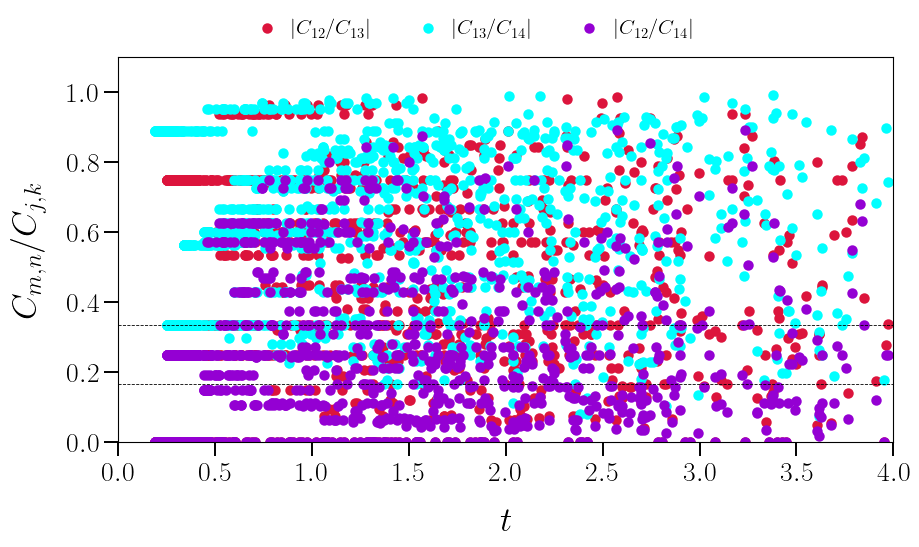

In [155]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.latex.preamble'] = r'\usepackage{braket}'
plt.rcParams['font.family'] = 'sans-serif'

#z_length, ratio12,ratio23,ratio13

plt.scatter(z_length,ratio12,color='crimson',lw=1.5,label='$|C_{12}/C_{13}|$')
plt.scatter(z_length,ratio23,color='cyan',lw=1.5,label='$|C_{13}/C_{14}|$')
plt.scatter(z_length,ratio13,color='darkviolet',lw=1.5,label='$|C_{12}/C_{14}|$')


plt.axhline(y=1.0/3.0, color='black', ls='dashed', lw=0.6)
plt.axhline(y=1.0/6.0, color='black', ls='dashed', lw=0.6)
#plt.axvline(x=t0, color='black', ls='dashed', lw=0.5)

plt.xlabel(r"$ t$", fontsize=25, labelpad=15)
plt.ylabel('$C_{m,n}/C_{j,k}$', fontsize=25, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,4]) #23,26
plt.ylim([0,1.1])
plt.tick_params(axis='x', direction='out', length=10, width=1.4)
plt.tick_params(axis='y', direction='out', length=10, width=1.4)

plt.legend(loc='lower center',fontsize=15,handlelength=1.25,handletextpad=0.6,labelspacing=1.2,ncol=4,markerscale=1.0,bbox_to_anchor=(0.46, 1.),frameon=False)
#plt.text(0.15,0.535,s=r'$\displaystyle \frac{1}{\sqrt{5}}$',ha="center", va="center",fontsize=17)
#plt.text(1.6,0.8,s=r'$t_0=1.12079$',ha="center", va="center",fontsize=17)
#plt.savefig('QFT5_symmetric.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [168]:
for k1 in range(-13,14,1):
    for k2 in range(-13,14,1):
        for k3 in range(-13,14,1):
            C1=0.5*np.pi*(k1-2*k2-1+k3)
            C2=0.5*np.pi*(3*k1+2*k2+1-k3)
            C3=-np.pi*(5*k1+k3)/6
            if C1>0 and C2>0 and C3 > 0:
                print(f'k1={k1}, k2={k2}, k3={k3}')
                print(f'C1={C1}, C2={C2}, C3={C3}\n')

k1=1, k2=-8, k3=-13
C1=4.71238898038469, C2=1.5707963267948966, C3=4.1887902047863905

k1=1, k2=-7, k3=-13
C1=1.5707963267948966, C2=4.71238898038469, C3=4.1887902047863905

k1=1, k2=-7, k3=-12
C1=3.141592653589793, C2=3.141592653589793, C3=3.665191429188092

k1=1, k2=-7, k3=-11
C1=4.71238898038469, C2=1.5707963267948966, C3=3.141592653589793

k1=1, k2=-6, k3=-11
C1=1.5707963267948966, C2=4.71238898038469, C3=3.141592653589793

k1=1, k2=-6, k3=-10
C1=3.141592653589793, C2=3.141592653589793, C3=2.6179938779914944

k1=1, k2=-6, k3=-9
C1=4.71238898038469, C2=1.5707963267948966, C3=2.0943951023931953

k1=1, k2=-5, k3=-9
C1=1.5707963267948966, C2=4.71238898038469, C3=2.0943951023931953

k1=1, k2=-5, k3=-8
C1=3.141592653589793, C2=3.141592653589793, C3=1.5707963267948966

k1=1, k2=-5, k3=-7
C1=4.71238898038469, C2=1.5707963267948966, C3=1.0471975511965976

k1=1, k2=-4, k3=-7
C1=1.5707963267948966, C2=4.71238898038469, C3=1.0471975511965976

k1=1, k2=-4, k3=-6
C1=3.141592653589793, C2=3.14159

In [3]:
def Angles_F7(vec):
    t, C12,C13,C14 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C14],
        [C14, C13, C12,  0 , C12, C13, C14],
        [C14, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]
    
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    return np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1])) - np.sort(np.abs(np.angle(dft(M))[:,1])))

In [4]:
def F7(vec):
    t, C12,C13,C14 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C14],
        [C14, C13, C12,  0 , C12, C13, C14],
        [C14, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/7
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3]])

In [6]:
z_length, max_strength, ratio12,ratio13,ratio23=[], [],[],[],[]
for n in range(5):
    guess = np.random.uniform(low=0.01, high=4, size=4)
    guess[0]=1
    result = least_squares(fun=F7,x0=guess,method='trf',bounds=(1e-10,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    #print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F7(result.x))
    if result.success and result.optimality<1e-14 and Angles_F7(result.x)<1e-13:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        #print("guess=",list(guess))
        print("Angle=",Angles_F7(result.x),"\n")
        #couplings=np.sort(result.x[1:])
        #z_length.append(result.x[0])
        #max_strength.append(result.x[0]*couplings[2])
        #ratio12.append(couplings[0]/couplings[1])
        #ratio23.append(couplings[1]/couplings[2])
        #ratio13.append(couplings[0]/couplings[2])


Solution = [0.9766895731071434, 3.434358379348215, 2.455636747201853, 3.3002115239635303]
Optimality= 1.2796941559225055e-15
Angle= 2.7652584186481322e-14 

Solution = [1.1193817501104741, 1.8146493691994816, 2.6686093457645983, 1.9316959754233236]
Optimality= 5.663742645724965e-15
Angle= 1.9983725792103277e-14 

Solution = [0.995340977395419, 3.961556795574817, 1.3436780699796074, 1.9091603731463063]
Optimality= 2.585523590803456e-15
Angle= 2.1696556769355404e-14 



In [ ]:
Solution = [1.0363027353228484, 1.605878196021087, 2.6547290877177847, 0.9363175361846335]
guess= [1.0, 1.4808837649417752, 2.795643180483591, 0.5137219897476785]


Solution = [0.9996654550253181, 1.003003200466698, 3.046521110216934, 0.43996713124542186]
guess= [1.0, 1.1283725780805463, 2.980147622797212, 0.27853466072416017]

Solution = [1.136068260651784, 0.2078128514431185, 1.049229909026735, 0.3231402833037426]
guess= [1.0, 0.014099253764137508, 0.7432398842697876, 0.09597785447616762]

Solution = [0.9004945429069235, 1.731388856992096, 0.6698530369015523, 1.5858912124462616]
guess= [1.0, 1.6375747077079639, 0.5052380690344688, 1.6765952343998487]

Solution = [1.0153082455237374, 0.4650599179528708, 2.348049083669071, 0.723148701328702]
guess= [1.0, 0.1916603853301507, 2.4671914286883863, 0.26764770079963063]

Solution = [1.0933531305562836, 1.4924882863729707, 1.2528221963281643, 3.0014012900842837]
guess= [1.0, 1.6715115878259477, 1.0048251390348226, 2.946572065399895]

In [54]:
print(0.9996654550253181*1.003003200466698/np.pi)
print(1*np.pi/10)

0.31915902580198524
0.3141592653589793


In [337]:
Solution = [0.9863748715388617, 2.251288630510631, 0.31306566746934456, 1.9856293184177964]
#Optimality= 1.800335938686336e-15
#guess= [1.0, 2.553999752266338, 0.38270007226875696, 1.7461047040784239]
#Angle= 9.846089116055586e-15

t, C12,C13,C14 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C14],
    [C14, C13, C12,  0 , C12, C13, C14],
    [C14, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C14, C13, C12,  0 ]
])

M = C.shape[0]
C_l = np.array([ 0 , C12, C13, C14, C14, C13, C12])

D=dft(M) @ C @ np.conjugate(dft(M))/M
D=np.diagonal(D.real, offset=0)
print("Eigenvalues:\n ",list(D),"\n")


L0=np.sum(C_l)
L1,L2,L3=0,0,0
L4,L5,L6=0,0,0
for l in range(M):
    L1+=C_l[l]*np.cos(2*np.pi*1*l/M)
    L2+=C_l[l]*np.cos(2*np.pi*2*l/M)
    L3+=C_l[l]*np.cos(2*np.pi*3*l/M)

    L4+=C_l[l]*np.cos(2*np.pi*4*l/M)
    L5+=C_l[l]*np.cos(2*np.pi*5*l/M)
    L6+=C_l[l]*np.cos(2*np.pi*6*l/M)

print(f"lambda_0: {L0}, \t {D[0]}" )
print(f"lambda_1: {L1}, \t {D[1]}" )
print(f"lambda_2: {L2}, \t {D[2]}" )
print(f"lambda_3: {L3}, \t {D[3]}" )
print(f"lambda_4: {L4}, \t {D[4]}" )
print(f"lambda_5: {L5}, \t {D[5]}" )
print(f"lambda_6: {L6}, \t {D[6]}" )

Eigenvalues:
  [9.099967232795542, -0.9099967232795537, 0.9099967232795517, -4.549983616397769, -4.5499836163977685, 0.9099967232795518, -0.9099967232795534] 

lambda_0: 9.099967232795544, 	 9.099967232795542
lambda_1: -0.9099967232795538, 	 -0.9099967232795537
lambda_2: 0.9099967232795511, 	 0.9099967232795517
lambda_3: -4.549983616397769, 	 -4.549983616397769
lambda_4: -4.549983616397769, 	 -4.5499836163977685
lambda_5: 0.9099967232795636, 	 0.9099967232795518
lambda_6: -0.9099967232795505, 	 -0.9099967232795534


In [15]:
z_length, max_strength, ratio12,ratio23,ratio13 =np.array(z_length), np.array(max_strength), np.array(ratio12),np.array(ratio23),np.array(ratio13)

Indices = np.argsort(max_strength)
#Indices = np.argsort(z_length)
max_strength, ratio12,ratio23,ratio13 = max_strength[Indices], ratio12[Indices],ratio23[Indices],ratio13[Indices]
print("strength:", min(max_strength),max(max_strength))
print("length:",min(z_length), max(z_length))
print("Ration 12:", min(ratio12), max(ratio12))
print("Ration 13:", min(ratio13), max(ratio13))
print("Ration 23:", min(ratio23), max(ratio23))

strength: 1.191996797771822 6.490472470285407
length: 0.3230221155075506 1.7022526141619967
Ration 12: 0.005785795212601104 0.9668932909594614
Ration 13: 0.004996737313543473 0.8001192850172744
Ration 23: 0.14748898226795035 0.9691855788304815


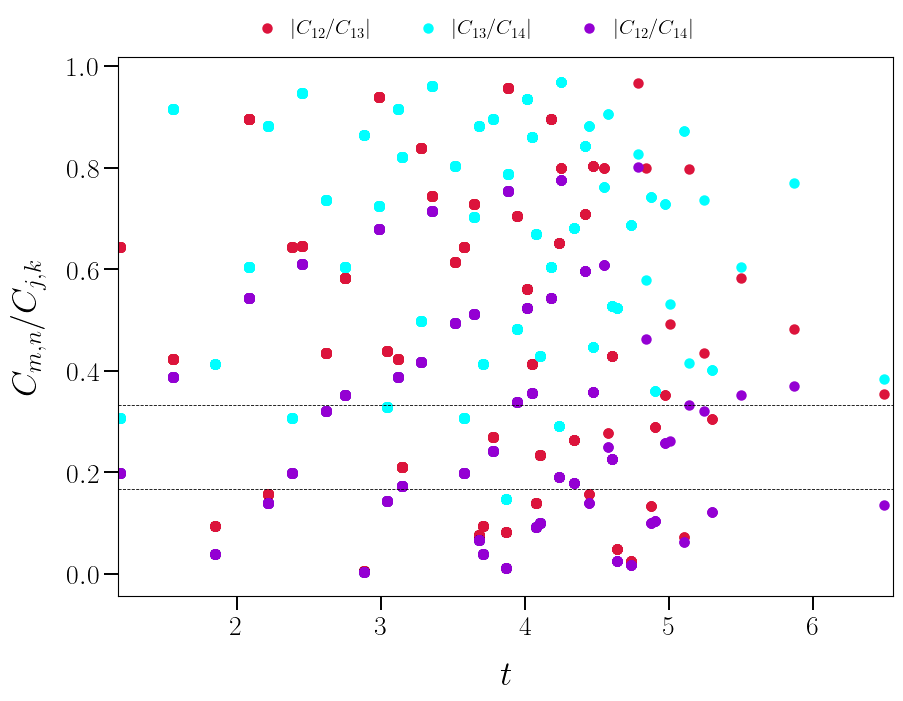

In [17]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.latex.preamble'] = r'\usepackage{braket}'
plt.rcParams['font.family'] = 'sans-serif'

#z_length, ratio12,ratio23,ratio13

#plt.scatter(z_length,ratio12,color='crimson',lw=1.5,label='$|C_{12}/C_{13}|$')
#plt.scatter(z_length,ratio23,color='cyan',lw=1.5,label='$|C_{13}/C_{14}|$')
#plt.scatter(z_length,ratio13,color='darkviolet',lw=1.5,label='$|C_{12}/C_{14}|$')

plt.scatter(max_strength,ratio12,color='crimson',lw=1.5,label='$|C_{12}/C_{13}|$')
plt.scatter(max_strength,ratio23,color='cyan',lw=1.5,label='$|C_{13}/C_{14}|$')
plt.scatter(max_strength,ratio13,color='darkviolet',lw=1.5,label='$|C_{12}/C_{14}|$')


plt.axhline(y=1.0/3.0, color='black', ls='dashed', lw=0.6)
plt.axhline(y=1.0/6.0, color='black', ls='dashed', lw=0.6)
#plt.axvline(x=t0, color='black', ls='dashed', lw=0.5)

plt.xlabel(r"$ t$", fontsize=25, labelpad=15)
plt.ylabel('$C_{m,n}/C_{j,k}$', fontsize=25, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([min(max_strength)*0.99,max(max_strength)*1.01]) #23,26
#plt.xlim([min(z_length)*0.99,max(z_length)*1.01])
#plt.ylim([0,1.1])
plt.tick_params(axis='x', direction='out', length=10, width=1.4)
plt.tick_params(axis='y', direction='out', length=10, width=1.4)

plt.legend(loc='lower center',fontsize=15,handlelength=1.25,handletextpad=0.6,labelspacing=1.2,ncol=4,markerscale=1.0,bbox_to_anchor=(0.46, 1.),frameon=False)
#plt.text(0.15,0.535,s=r'$\displaystyle \frac{1}{\sqrt{5}}$',ha="center", va="center",fontsize=17)
#plt.text(1.6,0.8,s=r'$t_0=1.12079$',ha="center", va="center",fontsize=17)
#plt.savefig('QFT5_symmetric.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [13]:
print(list(ratio12))

[0.6431041321077893, 0.09485077393689331, 0.0948507739368927, 0.6431041321077914, 0.6431041321077863, 0.09485077393689233, 0.6431041321077888, 0.6431041321077897, 0.8964030390410158, 0.6431041321077906, 0.094850773936892, 0.09485077393689051, 0.6431041321077591, 0.8964030390410157, 0.6431041321077906, 0.4223827155636316, 0.09485077393689166, 0.6431041321077922, 0.6431041321077904, 0.6431041321077893, 0.0948507739368911, 0.09485077393689174, 0.6431041321078144, 0.6431041321077904, 0.6431041321077924, 0.6431041321077903, 0.6431041321077906, 0.6431041321077873, 0.6431041321077895, 0.6431041321077903, 0.6431041321077835, 0.09485077393689056, 0.6431041321077894, 0.6431041321077894, 0.6431041321077907, 0.6431041321077896, 0.0948507739368905, 0.42238271556363166, 0.6431041321077895, 0.6431041321077919, 0.643104132107791, 0.6431041321077928, 0.6431041321077912, 0.6431041321077892, 0.6431041321077914, 0.64310413210779, 0.15766571563256448, 0.6431041321077896, 0.6431041321077904, 0.6431041321077

In [17]:
def Angles_F8(vec):
    t, C12,C13,C14,C15 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,7])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,7])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [18]:
def F8(vec):
    t, C12,C13,C14,C15 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/8
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3],exp_C[0,4]])

In [23]:
for n in range(47500):
    guess = np.random.uniform(low=0.01, high=3, size=5)
    guess[0]=1
    result = least_squares(fun=F8,x0=guess,method='trf',bounds=(1e-10,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    #print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F8(result.x))
    if result.success and result.optimality<1e-14 and Angles_F8(result.x)<1e-10:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F8(result.x),"\n")

Solution = [0.8303264925161684, 1.6147365436989665, 0.4729453838196987, 0.27704499157982965, 2.6011986867118537]
Optimality= 1.5041723288824954e-15
guess= [1.0, 0.8500383531920133, 0.6088224397830208, 0.3274160972884386, 2.370180984254965]
Angle= 5.232744337284843e-23 

Solution = [1.009071479695703, 2.107042699002709, 2.7241812172909974, 1.006307263615573, 2.529474328841028]
Optimality= 2.922334954350133e-16
guess= [1.0, 2.5662928713583453, 2.878729945848526, 1.0544155555386474, 2.046451735533831]
Angle= 3.525197153955509e-14 

Solution = [0.9119424492739735, 1.113486887613929, 2.153091360158551, 2.331459288639752, 1.9368572685138126]
Optimality= 8.327178295068656e-15
guess= [1.0, 1.2602223429006796, 1.9805553685777733, 2.2228512824531617, 1.4954059730711442]
Angle= 7.639773269274538e-11 

Solution = [0.6991255867567864, 1.9177649281682938, 0.5617003427387611, 0.3290364427867514, 0.27988472350747357]
Optimality= 2.406128796096785e-16
guess= [1.0, 1.1736202743423159, 0.4642647095657917

In [177]:
print(1.6147365436989665/2.6011986867118537)
print(0.4729453838196987/2.6011986867118537)
print(0.27704499157982965/2.6011986867118537)
print(0.4729453838196987/1.6147365436989665)
print(0.27704499157982965/1.6147365436989665)

0.620766322829471
0.18181824642451427
0.10650666286858661
0.2928932188134521
0.1715728752538091


In [253]:
Solution = [0.8303264925161684, 1.6147365436989665, 0.4729453838196987, 0.27704499157982965, 2.6011986867118537]
t, C12,C13,C14,C15 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C15, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C15, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C15, C14],
    [C14, C13, C12,  0 , C12, C13, C14, C15],
    [C15, C14, C13, C12,  0 , C12, C13, C14],
    [C14, C15, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C15, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C15, C14, C13, C12,  0 ]
], dtype=complex)
M = C.shape[0]
eigenvalues, eigenvectors = np.linalg.eigh(C)

D=dft(M) @ C @ np.conjugate(dft(M))/M
print("Eigenvalues: ",np.diagonal(D.real, offset=0),"\n")

C_l = np.array([0, 1.6147365436989665, 0.4729453838196987, 0.27704499157982965, 2.6011986867118537, 0.27704499157982965, 0.4729453838196987,1.6147365436989665])

suma=0
a_1,b_1=0,0
a_2,b_2=0,0
a_3,b_3=0,0
a_4,b_4=0,0
a_5,b_5=0,0
a_6,b_6=0,0
a_7,b_7=0,0
for l in range(M):
    suma+=(-1)**l * C_l[l]
    a_1+=C_l[l]*np.cos(2*np.pi*l/M)
    b_1+=C_l[l]*np.sin(2*np.pi*l/M)

    a_2+=C_l[l]*np.cos(2*np.pi*2*l/M)
    b_2+=C_l[l]*np.sin(2*np.pi*2*l/M)

    a_3+=C_l[l]*np.cos(2*np.pi*3*l/M)
    b_3+=C_l[l]*np.sin(2*np.pi*3*l/M)

    a_4+=C_l[l]*np.cos(2*np.pi*4*l/M)
    b_4+=C_l[l]*np.sin(2*np.pi*4*l/M)

    a_5+=C_l[l]*np.cos(2*np.pi*5*l/M)
    b_5+=C_l[l]*np.sin(2*np.pi*5*l/M)

    a_6+=C_l[l]*np.cos(2*np.pi*6*l/M)
    b_6+=C_l[l]*np.sin(2*np.pi*6*l/M)

    a_7+=C_l[l]*np.cos(2*np.pi*7*l/M)
    b_7+=C_l[l]*np.sin(2*np.pi*7*l/M)

print("lambda_0 = ",np.sum(C_l))
print("lambda_1 =", (-1)**1*np.sqrt(a_1**2+b_1**2))
print("lambda_2 =", (-1)**2*np.sqrt(a_2**2+b_2**2))
print("lambda_3 =", (-1)**3*np.sqrt(a_3**2+b_3**2))
#print("lambda_4 =", np.sqrt(a_4**2+b_4**2))
print("lambda_4 =",suma)
print("lambda_5 =", (-1)**5*np.sqrt(a_5**2+b_5**2))
print("lambda_6 =", (-1)**6*np.sqrt(a_6**2+b_6**2))
print("lambda_7 =", (-1)**7*np.sqrt(a_7**2+b_7**2))

Eigenvalues:  [ 7.330652524908843   -0.7094171514330548   1.6553079190724562  -4.492980221990653   -0.23647361620634122 -4.492980221990655    1.655307919072457   -0.7094171514330546 ] 

lambda_0 =  7.330652524908844
lambda_1 = -0.7094171514330545
lambda_2 = 1.6553079190724556
lambda_3 = -4.492980221990653
lambda_4 = -0.23647361620634122
lambda_5 = -4.492980221990653
lambda_6 = 1.6553079190724544
lambda_7 = -0.7094171514330498


In [ ]:
[ 7.330652524908843   -0.7094171514330548   1.6553079190724562  -4.492980221990653   -0.23647361620634122 -4.492980221990655   
1.655307919072457   -0.7094171514330546 ] 

In [178]:
def Angles_F9(vec):
    t, C12,C13,C14,C15 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,8])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,8])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [179]:
def F9(vec):
    t, C12,C13,C14,C15 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/9
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3],exp_C[0,4]])

In [187]:
for n in range(5000):
    guess = np.random.uniform(low=0.01, high=4, size=5)
    guess[0]=1
    result = least_squares(fun=F9,x0=guess,method='trf',bounds=(1e-3,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F9(result.x))
    if result.success and result.optimality<1e-14 and Angles_F9(result.x)<1e-4:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F9(result.x),"\n")

step 0,   Opt->1e-15 0.0026345986803203497
step 1,   Opt->1e-15 0.8552301321195898
step 2,   Opt->1e-15 0.8552301321195467
step 3,   Opt->1e-15 0.43957898189352707
step 4,   Opt->1e-16 0.855230132119563
step 5,   Opt->1e-15 0.43957898189353506
step 6,   Opt->1e-15 0.8552301321195029
step 7,   Opt->1e-15 0.4395789818935254
step 8,   Opt->1e-15 0.4395789818935327
step 9,   Opt->1e-16 0.8552301321195271
step 10,   Opt->1e-16 0.43957898189352457
step 11,   Opt->1e-15 0.27536163589579293
step 12,   Opt->1e-15 0.07689663747670718
step 13,   Opt->1e-15 0.8552301321195686
step 14,   Opt->1e-15 0.8552301321195627
step 15,   Opt->1e-15 0.002871132127479394
step 16,   Opt->1e-15 0.0036780729566079115
step 17,   Opt->1e-15 0.0010518810825725616
step 18,   Opt->1e-15 0.0233955477478515
step 19,   Opt->1e-15 0.8552301321195538
step 20,   Opt->1e-15 0.43957898189352607
step 21,   Opt->1e-15 0.4395789818935276
step 22,   Opt->1e-15 0.4395789818935247
step 23,   Opt->1e-16 0.855230132119585
step 24,   

KeyboardInterrupt: 

In [ ]:
Solution = [0.8955822260829063, 2.0307251616454685, 1.7599978200695374, 1.0000000000000002e-10, 3.2250318246984175]
Optimality= 4.0812777709495764e-16
guess= [1.0, 2.408735657430431, 1.1821661425430994, 0.061394846513611344, 3.5414828699024747]
Angle= 6.496759939858229e-20


Solution = [0.8815121576171636, 0.6833454513722579, 1.8967147857372728, 2.1132890817642163, 2.171763284087513]
Optimality= 1.3381313476341843e-15
guess= [1.0, 1.0304118467767065, 2.136066520435266, 1.6040519985682284, 1.8926387039912327]
Angle= 1.1470858553227122e-05

Solution = [0.8801926331014557, 1.89955821064787, 2.175019042870189, 1.2248536057058934, 0.6843698760741601]
Optimality= 3.548290997052803e-15
guess= [1.0, 2.1880047809716254, 1.785793038621073, 1.0741299065382306, 0.8540240033635907]
Angle= 5.96149825543321e-07

Solution = [1.0441653230302326, 2.410358787172516, 2.1781555240662005, 3.64778566814932, 3.4347174747590463]
Optimality= 9.23942944086155e-15
guess= [1.0, 2.34488939743783, 2.0239374160414574, 3.971340761064731, 3.5784313177214275]
Angle= 6.933811840207016e-09

Solution = [0.8955822260829063, 2.0307251616454685, 1.7599978200695374, 1.0000000000000002e-10, 3.2250318246984175]


In [208]:
Solution1 = [0.8815121576171636, 0.6833454513722579, 1.8967147857372728, 2.1132890817642163, 2.171763284087513]
Solution2 = [0.8801926331014557, 1.89955821064787, 2.175019042870189, 1.2248536057058934, 0.6843698760741601]

#Aca hay una fase libre en : 2.1132890817642163
#Solution3 = [0.8815121576171636, 0.6833454513722579, 1.8967147857372728, 1.2248536057058934, 2.171763284087513]
Solution = [0.8955822260829063, 2.0307251616454685, 1.7599978200695374, 0, 3.2250318246984175]

t, C12,C13,C14,C15 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C15, C15, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C15, C15, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C15, C15, C14],
    [C14, C13, C12,  0 , C12, C13, C14, C15, C15],
    [C15, C14, C13, C12,  0 , C12, C13, C14, C15],
    [C15, C15, C14, C13, C12,  0 , C12, C13, C14],
    [C14, C15, C15, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C15, C15, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C15, C15, C14, C13, C12,  0 ]
], dtype=complex)
M = C.shape[0]

eigenvalues, eigenvectors = np.linalg.eigh(C)
exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

exp_C=fase_out@exp_C@fase_in
print(f'1/sqrt(9)={1/np.sqrt(9)}')
print(np.abs(exp_C),"\n")
print(np.angle(exp_C))

1/sqrt(9)=0.3333333333333333
[[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]] 

[[ 0.        -0.         0.         0.         0. 

In [190]:
print(np.angle(dft(9)))

[[ 0.         0.         0.         0.         0.         0.         0.         0.         0.       ]
 [ 0.        -0.6981317 -1.3962634 -2.0943951 -2.7925268  2.7925268  2.0943951  1.3962634  0.6981317]
 [ 0.        -1.3962634 -2.7925268  2.0943951  0.6981317 -0.6981317 -2.0943951  2.7925268  1.3962634]
 [ 0.        -2.0943951  2.0943951  0.        -2.0943951  2.0943951  0.        -2.0943951  2.0943951]
 [ 0.        -2.7925268  0.6981317 -2.0943951  1.3962634 -1.3962634  2.0943951 -0.6981317  2.7925268]
 [ 0.         2.7925268 -0.6981317  2.0943951 -1.3962634  1.3962634 -2.0943951  0.6981317 -2.7925268]
 [ 0.         2.0943951 -2.0943951  0.         2.0943951 -2.0943951  0.         2.0943951 -2.0943951]
 [ 0.         1.3962634  2.7925268 -2.0943951 -0.6981317  0.6981317  2.0943951 -2.7925268 -1.3962634]
 [ 0.         0.6981317  1.3962634  2.0943951  2.7925268 -2.7925268 -2.0943951 -1.3962634 -0.6981317]]


In [23]:
k1,k2,k3,k4,k5,k6,k7,k8=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
C = np.array([
    [ 0 , k1, k2, k3, k4, k5, k6, k7, k8],
    [k8,  0 , k1, k2, k3, k4, k5, k6, k7],
    [k7, k8,  0 , k1, k2, k3, k4, k5, k6],
    [k6, k7, k8,  0 , k1, k2, k3, k4, k5],
    [k5, k6, k7, k8,  0 , k1, k2, k3, k4],
    [k4, k5, k6, k7, k8,  0 , k1, k2, k3],
    [k3, k4, k5, k6, k7, k8,  0 , k1, k2],
    [k2, k3, k4, k5, k6, k7, k8,  0 , k1],
    [k1, k2, k3, k4, k5, k6, k7, k8,  0 ]
], dtype=complex)

D =dft(9)@C@np.conjugate(dft(9))/9.0
D=np.diagonal(D, offset=0)
print(D)

[ 3.6000000000000005 +0.j                  -0.44999999999999996-1.2363648387545794j  -0.45000000000000007-0.5362891166673943j  -0.44999999999999996-0.25980762113533157j
 -0.45000000000000007-0.07934714131880916j -0.45000000000000007+0.07934714131880889j -0.45000000000000023+0.25980762113533157j -0.44999999999999973+0.5362891166673945j
 -0.4499999999999992 +1.23636483875458j   ]


In [235]:
def Angles_F10(vec):
    t, C12,C13,C14,C15,C16 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,9])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,9])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [236]:
def F10(vec):
    t, C12,C13,C14,C15,C16 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/10
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3],exp_C[0,4],exp_C[0,5]])

In [238]:
for n in range(5000):
    guess = np.random.uniform(low=0.01, high=4, size=6)
    guess[0]=1
    result = least_squares(fun=F10,x0=guess,method='trf',bounds=(1e-3,4.15),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F10(result.x))
    if result.success and result.optimality<1e-14 and Angles_F10(result.x)<1e-4:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F10(result.x),"\n")

step 0,   Opt->1e-15 2.3789084901193442
step 1,   Opt->1e-15 3.1230866629277556
step 2,   Opt->1e-15 3.123086662927751
step 3,   Opt->1e-15 3.123086662927772
step 4,   Opt->1e-15 2.378908490119343
step 5,   Opt->1e-8 5.039017090309914
step 6,   Opt->1e-15 2.9435664341108434
step 7,   Opt->1e-16 2.37890849011935
step 8,   Opt->1e-16 2.7289667723073525
step 9,   Opt->1e-15 1.3726179750845605e-28
Solution = [0.9478109543112059, 1.3258309114491544, 1.4658026050299846, 1.3258309114491555, 3.837521040766631, 2.154475231104876]
Optimality= 2.292687972084314e-15
guess= [1.0, 1.362932939566256, 1.0146521754563245, 1.478615796994111, 3.8532256093121546, 1.9910660962746671]
Angle= 1.3726179750845605e-28 

step 10,   Opt->1e-15 1.3481632870227092e-27
Solution = [0.9110692852317052, 0.2634226911862491, 3.4204375212049034, 1.8055259856144341, 0.027810273462894285, 0.17241238973338976]
Optimality= 3.157739679868678e-15
guess= [1.0, 0.6606562414721255, 3.143776782214658, 1.221982123258504, 0.242329467

KeyboardInterrupt: 

In [327]:
Solution = [0.9532401549485255, 0.25176900251943857, 2.6795665036567087, 1.7256504152092074, 0.6161325258910344, 3.46048398102513]
#Optimality= 4.954349085566072e-15
#guess= [1.0, 0.4673346862746777, 2.4420624811232425, 1.6808527769147923, 0.603990766618575, 3.6490850293794717]
#Angle= 4.567504641229658e-28

t, C12,C13,C14,C15,C16 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C15, C16, C15, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C15, C16, C15, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C15, C16, C15, C14],
    [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C15],
    [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
    [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
    [C15, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
    [C14, C15, C16, C15, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C15, C16, C15, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C15, C16, C15, C14, C13, C12,  0 ]
], dtype=complex)
M = C.shape[0]
C_l = np.array([ 0 , C12, C13, C14, C15, C16, C15, C14, C13, C12])
D=dft(M) @ C @ np.conjugate(dft(M))/M
print("Eigenvalues: \n", list(np.diagonal(D.real, offset=0)),"\n")
suma=0
a_1,b_1=0,0
a_2,b_2=0,0
a_3,b_3=0,0
a_4,b_4=0,0
a_5,b_5=0,0
a_6,b_6=0,0
a_7,b_7=0,0
a_8,b_8=0,0
a_9,b_9=0,0
for l in range(10):
    suma+=(-1)**l * C_l[l]
    a_1+=C_l[l]*np.cos(2*np.pi*l/M)
    b_1+=C_l[l]*np.sin(2*np.pi*l/M)

    a_2+=C_l[l]*np.cos(2*np.pi*2*l/M)
    b_2+=C_l[l]*np.sin(2*np.pi*2*l/M)

    a_3+=C_l[l]*np.cos(2*np.pi*3*l/M)
    b_3+=C_l[l]*np.sin(2*np.pi*3*l/M)

    a_4+=C_l[l]*np.cos(2*np.pi*4*l/M)
    b_4+=C_l[l]*np.sin(2*np.pi*4*l/M)

    a_5+=C_l[l]*np.cos(2*np.pi*5*l/M)
    b_5+=C_l[l]*np.sin(2*np.pi*5*l/M)

    a_6+=C_l[l]*np.cos(2*np.pi*6*l/M)
    b_6+=C_l[l]*np.sin(2*np.pi*6*l/M)

    a_7+=C_l[l]*np.cos(2*np.pi*7*l/M)
    b_7+=C_l[l]*np.sin(2*np.pi*7*l/M)
    
    a_8+=C_l[l]*np.cos(2*np.pi*8*l/M)
    b_8+=C_l[l]*np.sin(2*np.pi*8*l/M)

    a_9+=C_l[l]*np.cos(2*np.pi*9*l/M)
    b_9+=C_l[l]*np.sin(2*np.pi*9*l/M)


lambda_6=np.sqrt(a_6**2+b_6**2)
lambda_7=np.sqrt(a_7**2+b_7**2)
lambda_8=np.sqrt(a_8**2+b_8**2)
lambda_9=np.sqrt(a_9**2+b_9**2)
print("lambda_0 =", np.sum(C_l))
print("lambda_1 =", (-1)**1*np.sqrt(a_1**2+b_1**2))
print("lambda_2 =", (-1)**2*np.sqrt(a_2**2+b_2**2))
print("lambda_3 =", (-1)**3*np.sqrt(a_3**2+b_3**2))
print("lambda_4 =", (-1)**4*np.sqrt(a_4**2+b_4**2))
print("lambda_5 =",suma)

#print("lambda_6 =", )
#print("lambda_7 =", )
#print("lambda_8 =", )
#print("lambda_9 =", )

print("\n-----------------------------------------------------------------------------\n")

L0=np.sum(C_l)
L1,L2,L3,L4,L5,L6,L7,L8,L9=0,0,0,0,0,0,0,0,0
w=np.exp(1j*2*np.pi/M)
for l in range(M):
    L1+=C_l[l]*w**(-l)
    L2+=C_l[l]*w**(-l*2)
    L3+=C_l[l]*w**(-l*3)
    L4+=C_l[l]*w**(-l*4)
    L5+=C_l[l]*w**(-l*5)
    L6+=C_l[l]*w**(-l*6)
    L7+=C_l[l]*w**(-l*7)
    L8+=C_l[l]*w**(-l*8)
    L9+=C_l[l]*w**(-l*9)

#L1=C_l[5]*np.cos(-np.pi*1)

print(f"L0: {L0}" )
print(f"L1: {L1.real}" )
print(f"L2: {L2.real}" )
print(f"L3: {L3.real}" )
print(f"L4: {L4.real}" )
print(f"L5: {L5.real}" )
print(f"L6: {L6.real}" )
print(f"L7: {L7.real}" )
print(f"L8: {L8.real}" )
print(f"L9: {L9.real}" )

Eigenvalues: 
 [14.00672087557791, -3.460483981025133, -3.1309140780703544, -4.778763592844227, 4.778763592844227, -0.8239247573869355, 4.778763592844225, -4.778763592844226, -3.1309140780703553, -3.4604839810251335] 

lambda_0 = 14.006720875577908
lambda_1 = -3.4604839810251327
lambda_2 = 3.1309140780703557
lambda_3 = -4.778763592844224
lambda_4 = 4.778763592844228
lambda_5 = -0.8239247573869355

-----------------------------------------------------------------------------

L0: 14.006720875577908
L1: -3.4604839810251327
L2: -3.1309140780703535
L3: -4.778763592844221
L4: 4.778763592844222
L5: -0.8239247573869345
L6: 4.77876359284422
L7: -4.778763592844216
L8: -3.130914078070349
L9: -3.4604839810251233


In [268]:
def Angles_F12(vec):
    t, C12,C13,C14,C15,C16,C17 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
        [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,9]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,10]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,11])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,9]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,10]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,11])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [263]:
def F12(vec):
    t, C12,C13,C14,C15,C16,C17 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
        [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1/12
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3],exp_C[0,4],exp_C[0,5],exp_C[0,6]])

In [273]:
for n in range(5000):
    guess = np.random.uniform(low=0.01, high=4, size=7)
    guess[0]=1
    result = least_squares(fun=F12,x0=guess,method='trf',bounds=(1e-3,5.1),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=15000)
    #print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F12(result.x))
    if result.success and result.optimality<1e-14 and Angles_F12(result.x)<1e-4:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F12(result.x),"\n")

Solution = [0.9801941855720748, 4.130296216095251, 0.5341786181813662, 0.8012679272720473, 2.3147740121192477, 2.279847202081129, 0.14303858729561622]
Optimality= 2.9758647057282363e-15
guess= [1.0, 3.95619481681263, 0.40884308651657614, 0.44979188418860944, 2.159394728124559, 2.5336397389915835, 0.699173447610678]
Angle= 2.50457817122757e-06 

Solution = [1.0902092252281586, 2.04978358260086, 1.4408209822900366, 0.7204104911450171, 3.0417331848345244, 3.71350034655929, 2.5096285146750574]
Optimality= 4.1770400479820565e-15
guess= [1.0, 1.9355171754682063, 1.9299328676920702, 0.6866418663031054, 3.0940537164395043, 3.6463665148245283, 2.1670953666158304]
Angle= 9.17141641980648e-06 

Solution = [1.002604190545091, 2.6111938317035728, 1.5667162990221406, 0.2611193831703565, 2.959353009264047, 2.6111938317035714, 0.3792976943661919]
Optimality= 2.3842235107292263e-15
guess= [1.0, 2.890609632258959, 1.062479047541256, 0.07278985067591388, 2.339736562352679, 2.6274690136509977, 0.563993955

In [ ]:
Solution = [0.9801941855720748, 4.130296216095251, 0.5341786181813662, 0.8012679272720473, 2.3147740121192477, 2.279847202081129, 0.14303858729561622]
Optimality= 2.9758647057282363e-15
guess= [1.0, 3.95619481681263, 0.40884308651657614, 0.44979188418860944, 2.159394728124559, 2.5336397389915835, 0.699173447610678]
Angle= 2.50457817122757e-06 

Solution = [1.0902092252281586, 2.04978358260086, 1.4408209822900366, 0.7204104911450171, 3.0417331848345244, 3.71350034655929, 2.5096285146750574]
Optimality= 4.1770400479820565e-15
guess= [1.0, 1.9355171754682063, 1.9299328676920702, 0.6866418663031054, 3.0940537164395043, 3.6463665148245283, 2.1670953666158304]
Angle= 9.17141641980648e-06 

Solution = [1.002604190545091, 2.6111938317035728, 1.5667162990221406, 0.2611193831703565, 2.959353009264047, 2.6111938317035714, 0.3792976943661919]
Optimality= 2.3842235107292263e-15
guess= [1.0, 2.890609632258959, 1.062479047541256, 0.07278985067591388, 2.339736562352679, 2.6274690136509977, 0.5639939553059796]
Angle= 7.929791326945209e-06 

Solution = [1.0015704667600036, 3.519366511985262, 2.0911110819475214, 0.261388885243439, 2.439629595605441, 1.7084111928835455, 4.039194774409203]
Optimality= 2.1084710423746286e-15
guess= [1.0, 3.6543965718264264, 2.0175566538860514, 0.25556925038709016, 2.6009714881846806, 2.50843671378601, 3.9734498950270454]
Angle= 7.774306865333974e-06 

Solution = [0.9836873910774907, 3.1936900707333677, 2.129126713822246, 0.7984225176833435, 2.8388356184296617, 3.1936900707333717, 3.347454589708449]
Optimality= 1.1071567834332927e-15
guess= [1.0, 2.9290454004311566, 2.081945390140457, 0.7956053805104237, 3.04453378628346, 3.2198083943187927, 3.3709945679306643]
Angle= 5.732586722346895e-05 

Solution = [0.9542484287253205, 1.6461083712688513, 1.64610837126885, 2.4691625569032762, 2.3777120918327843, 1.6461083712688498, 2.0510295999802106]
Optimality= 2.8876518957532864e-15
guess= [1.0, 1.6338905467808527, 1.8017852351432995, 2.425647296418839, 1.9872972164993932, 1.7990234815295525, 1.9007269389565205]
Angle= 5.273385363212225e-07 

Solution = [0.915532181915197, 0.7251483429986986, 1.1438129340314074, 2.573579101570666, 1.525083912041876, 2.7062904590955266, 3.281630511071025]
Optimality= 6.568790312374508e-15
guess= [1.0, 0.933821072422214, 1.057512418570279, 2.385651882550358, 1.6553351585291403, 2.9897653137338276, 3.130495451503247]
Angle= 5.11126654451772e-07 

Solution = [1.0269330838476458, 3.5690654891120994, 1.5295994953337586, 2.8042657414452212, 2.209421493259872, 3.569065489112098, 1.13149723457647]
Optimality= 3.0564185516703013e-15
guess= [1.0, 3.3947664273092455, 1.4259535900126756, 2.8034399974836965, 2.311774247115436, 3.703025004675379, 1.1232801946554]
Angle= 2.2575909507571808e-05 

Solution = [0.9340215026757896, 2.3925498129012257, 0.5605853549391436, 4.204390162043566, 0.9343089248985702, 4.334474446368483, 1.0024849724545253]
Optimality= 6.502105883652261e-15
guess= [1.0, 2.6458223559856417, 0.5538680533309097, 3.816483575880975, 1.114774204584828, 3.8986506994520216, 1.1661623902848477]
Angle= 5.389363723569419e-05 

Solution = [1.0451168936999098, 3.873722030628059, 0.5009954185552039, 2.2544793834984107, 2.83897403847948, 2.1382229920343683, 0.1117493750821047]
Optimality= 5.308088552824444e-15
guess= [1.0, 3.7744690712467883, 0.4881917239650246, 2.1836265774602484, 2.918550158700137, 2.2533364392224766, 0.11901114009638052]
Angle= 1.3230380013032018e-05 

Solution = [1.047546366009555, 3.730808099230011, 1.9993340346083477, 1.2495837716302172, 2.6657787128111297, 0.2678599699866839, 0.12279459975877265]
Optimality= 3.037861939355022e-15
guess= [1.0, 3.415306586549528, 2.147809193345886, 1.4804035304120133, 2.844925082011496, 0.3461804378000628, 0.23293259585578915]
Angle= 8.816291945129368e-09 

Solution = [0.8918486012030244, 2.7781576442120484, 1.1741875804750042, 0.880640685356253, 3.1311668812666813, 0.7444050972129681, 2.4915675878879506]
Optimality= 6.916834368954934e-15
guess= [1.0, 2.3776803245115565, 1.1488799655380677, 0.5186842140075298, 2.9340618677960424, 1.2789786207100713, 2.096317410017116]
Angle= 3.474816650981692e-08 

Solution = [1.016575181044862, 4.359533190324995, 3.6054307615703505, 0.2575307686835954, 0.8584358956119867, 0.791082183346939, 0.8901939183298847]
Optimality= 2.4558226184570418e-15
guess= [1.0, 3.938410628283464, 3.9549064056551693, 0.4081349858857465, 0.12703819340918363, 0.3199385626659698, 1.0281592353948517]
Angle= 5.539646523302841e-06 

Solution = [1.0654188486463327, 2.457243816662139, 3.440141343326992, 1.7200706716634966, 4.095406361103563, 2.457243816662138, 0.1039642693211267]
Optimality= 5.362775431195149e-16
guess= [1.0, 2.936023025021807, 3.675415519098119, 1.789914387764981, 3.8278523536834306, 2.360739202296207, 0.5151095164613151]
Angle= 5.486284221628809e-05 

Solution = [1.0875798192547397, 3.851478420826846, 1.92573921041342, 0.24071740130167757, 3.2095653506890374, 3.851478420826845, 2.2831331837294924]
Optimality= 8.871567678150574e-15
guess= [1.0, 3.8689400045336906, 2.211479514531025, 0.25564908578636414, 3.5567689208218813, 3.6469901575870414, 2.263723657940822]
Angle= 8.58969030177609e-08 

Solution = [1.1407362802245156, 0.5819895940778937, 2.7540043286529627, 2.065503246489724, 3.0600048096144032, 2.1720147345750718, 0.35222163667806156]
Optimality= 7.594168772352201e-15
guess= [1.0, 0.66644515391023, 2.9301840563520316, 2.569605190355014, 3.3792750064161066, 2.095528979859546, 2.8784805118573242]
Angle= 2.2830559978742406e-06 

Solution = [0.987701896463575, 0.672162974531933, 3.180709346451731, 0.795177336612933, 2.827297196845983, 2.508546371919799, 3.5720498721245137]
Optimality= 2.070993042928671e-15
guess= [1.0, 0.7181226514633325, 3.268320126760483, 0.6442855191636069, 2.778190213163161, 2.3602538409180855, 3.2968300569757965]
Angle= 4.844325079141731e-07 

Solution = [1.0104826035714558, 1.1751765107870216, 2.5908351798818123, 2.8499186978699935, 2.2453904892309042, 2.9701597770238823, 0.6646483387488152]
Optimality= 3.098687172060295e-15
guess= [1.0, 1.4606302799624329, 2.630176585218389, 2.7467458591934806, 2.156805516461652, 3.0592277354519233, 0.7092514968476408]
Angle= 2.866286129570353e-05 

Solution = [0.9973133300645788, 1.0500186046132451, 2.1000372092264885, 3.4125604649930446, 0.7000124030754944, 1.0500186046132418, 0.11760578898068291]
Optimality= 3.779646932506586e-15
guess= [1.0, 1.0391606777895033, 1.9981053750840687, 3.37866835990995, 0.5931510117951346, 0.7557760647637755, 0.1992553015418474]
Angle= 1.14569229478006e-05 

Solution = [0.9925845862141323, 1.1963669764461793, 3.692573388800732, 2.9013076626291467, 1.9342051084194305, 3.02371689646894, 2.4870118290456205]
Optimality= 8.648236363269454e-16
guess= [1.0, 0.8648096685355188, 3.7485722709646105, 2.8144004543767767, 2.091503297726035, 3.3735744513222152, 1.9737711668239708]
Angle= 3.9315627739188395e-05 

Solution = [0.9846052175994933, 1.2060624898690342, 2.658927488089355, 1.3294637440446766, 2.304403823010774, 3.048221491073935, 3.8643135254115877]
Optimality= 8.884161411959293e-15
guess= [1.0, 1.2876627475158817, 2.512526880527396, 1.0927963384019834, 2.284894067237539, 3.519110907957999, 3.7882982790853026]
Angle= 1.9417297345142596e-06 

Solution = [0.9272561745301584, 2.2587017050109455, 1.129350852505473, 1.411688565631841, 0.3764502841684907, 2.258701705010944, 3.260355053871665]
Optimality= 1.327462507106234e-15
guess= [1.0, 2.459528378295698, 0.8741076281384835, 1.30637017583191, 0.3321460253158558, 2.5669653646905815, 3.394941195143829]
Angle= 8.130368772162889e-06 

Solution = [0.925562612151378, 0.15158117585733136, 3.9599605483941502, 1.9799802741970756, 1.3199868494647178, 2.1112534232250404, 0.14020523771690674]
Optimality= 6.125984725313794e-16
guess= [1.0, 0.22892748328418763, 3.735715333696474, 1.70083779598322, 1.4488380856826177, 1.3820954330690025, 0.20498419265098333]
Angle= 5.464439113135988e-10 

Solution = [0.9327997485925391, 3.7788320220145453, 3.3679175603659908, 0.2806597966971655, 1.4968522490515503, 1.834363911928773, 2.9612810709236532]
Optimality= 4.024206645497631e-15
guess= [1.0, 3.6183122137192383, 3.194125048721779, 0.3035916837317943, 1.7738725118328835, 1.6220542853425661, 2.6790747292639203]
Angle= 1.073010667292163e-05 

Solution = [0.8133799648197221, 0.6437320787884792, 4.506124551519348, 3.5405264333366304, 3.6478151131347105, 0.6437320787884779, 1.1089866100044419]
Optimality= 7.817623097949992e-15
guess= [1.0, 0.18245528163969602, 3.436514971807735, 2.105615951741635, 3.712956323476758, 0.8358450579661957, 0.31181557552086714]
Angle= 1.3847872393921236e-05 

Solution = [0.9999935542582825, 1.7111052252167178, 3.141612903615147, 1.8326075271088362, 1.396272401606733, 3.5249162808085264, 1.965056211052033]
Optimality= 2.56737152484358e-15
guess= [1.0, 1.2526849311094874, 2.8058711632096935, 2.0096662797926808, 1.4913029656597547, 3.441789267014591, 1.5673622690699578]
Angle= 1.918583893790705e-09

In [332]:
Solution = [0.925562612151378, 0.15158117585733136, 3.9599605483941502, 1.9799802741970756, 1.3199868494647178, 2.1112534232250404, 0.14020523771690674]
t, C12,C13,C14,C15,C16,C17 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15, C14],
    [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16, C15],
    [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C16],
    [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
    [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
    [C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
    [C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
    [C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12,  0 ]
], dtype=complex)

M = C.shape[0]
C_l = np.array([0, C12, C13, C14, C15, C16, C17, C16, C15, C14, C13, C12])

D=dft(M) @ C @ np.conjugate(dft(M))/M
D=np.diagonal(D.real, offset=0)
print("Eigenvalues:\n ",list(D),"\n")


L0=np.sum(C_l)
L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11=0,0,0,0,0,0,0,0,0,0,0
w=np.exp(1j*2*np.pi/M)
for l in range(M):
    L1+=C_l[l]*w**(-l)
    L2+=C_l[l]*w**(-l*2)
    L3+=C_l[l]*w**(-l*3)
    L4+=C_l[l]*w**(-l*4)
    L5+=C_l[l]*w**(-l*5)
    L6+=C_l[l]*w**(-l*6)
    L7+=C_l[l]*w**(-l*7)
    L8+=C_l[l]*w**(-l*8)
    L9+=C_l[l]*w**(-l*9)
    L10+=C_l[l]*w**(-l*10)
    L11+=C_l[l]*w**(-l*11)

#L1=C_l[5]*np.cos(-np.pi*1)

print(f"lambda_0: {L0}, \t {D[0]}" )
print(f"lambda_1: {L1.real}, \t {D[1]}" )
print(f"lambda_2: {L2.real}, \t {D[2]}" )
print(f"lambda_3: {L3.real}, \t {D[3]}" )
print(f"lambda_4: {L4.real}, \t {D[4]}" )
print(f"lambda_5: {L5.real}, \t {D[5]}" )
print(f"lambda_6: {L6.real}, \t {D[6]}" )
print(f"lambda_7: {L7.real}, \t {D[7]}" )
print(f"lambda_8: {L8.real}, \t {D[8]}" )
print(f"lambda_9: {L9.real}, \t {D[9]}" )
print(f"lambda_10: {L10.real}, \t {D[10]}" )
print(f"lambda_11: {L11.real}, \t {D[11]}" )

Eigenvalues:
  [19.18572977999354, -0.8944834374110315, -6.836868109453741, -5.42015263557577, -3.442616210830181, 5.894020359836084, 2.214470286875748, 5.894020359836084, -3.4426162108301837, -5.420152635575772, -6.83686810945374, -0.8944834374110316] 

lambda_0: 19.185729779993537, 	 19.18572977999354
lambda_1: -0.8944834374110358, 	 -0.8944834374110315
lambda_2: -6.836868109453742, 	 -6.836868109453741
lambda_3: -5.420152635575768, 	 -5.42015263557577
lambda_4: -3.4426162108301708, 	 -3.442616210830181
lambda_5: 5.894020359836088, 	 5.894020359836084
lambda_6: 2.214470286875747, 	 2.214470286875748
lambda_7: 5.894020359836065, 	 5.894020359836084
lambda_8: -3.4426162108301988, 	 -3.4426162108301837
lambda_9: -5.4201526355757705, 	 -5.420152635575772
lambda_10: -6.836868109453731, 	 -6.83686810945374
lambda_11: -0.8944834374110069, 	 -0.8944834374110316


In [341]:
def Angles_F14(vec):
    t, C12,C13,C14,C15,C16, C17, C18 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17],
        [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18],
        [C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
        [C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    M = C.shape[0]

    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T
    
    fase_in = np.diag(np.exp(-1j * np.angle(exp_C[0, :])))
    fase_out = np.diag(np.exp(1j * (np.angle(exp_C[0, 0]) - np.angle(exp_C[:, 0]))))

    exp_C=fase_out@exp_C@fase_in
    angles_dft=np.array([np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,9]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,10]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,11]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,12]))),np.linalg.norm(np.sort(np.abs(np.angle(dft(M))[:,13])))])
    angles_exp=np.array([np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,1]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,2]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,3]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,4]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,5]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,6]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,7]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,8]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,9]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,10]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,11]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,12]))),np.linalg.norm(np.sort(np.abs(np.angle(exp_C)[:,13])))])

    return np.dot(angles_dft-angles_exp,angles_dft-angles_exp)

In [342]:
def F14(vec):
    t, C12,C13,C14,C15,C16, C17, C18 = vec
    C = np.array([
        [ 0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12],
        [C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13],
        [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14],
        [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15],
        [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16],
        [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17],
        [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18],
        [C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
        [C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
        [C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
        [C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
        [C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
        [C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12],
        [C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 ]
    ], dtype=complex)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    exp_C = np.abs(eigenvectors @ np.diag(np.exp(-1j*eigenvalues * t)) @ eigenvectors.conj().T)**2-1.0/14.0
    return np.array([exp_C[0,0],exp_C[0,1],exp_C[0,2],exp_C[0,3],exp_C[0,4],exp_C[0,5],exp_C[0,6],exp_C[0,7]])

In [343]:
for n in range(5000):
    guess = np.random.uniform(low=0.01, high=5.1, size=8)
    guess[0]=1
    result = least_squares(fun=F14,x0=guess,method='trf',bounds=(1e-12,6.1),ftol=1e-14, xtol=1e-14, gtol=1e-14, max_nfev=18000)
    #print(f'step {n},   Opt->1e{int(math.floor(math.log10(abs(result.optimality))))}', Angles_F14(result.x))
    if result.success and result.optimality<1e-14 and Angles_F14(result.x)<1e-3:
        print("Solution =", list(result.x))
        print("Optimality=", result.optimality)
        print("guess=",list(guess))
        print("Angle=",Angles_F14(result.x),"\n")

Solution = [1.0748009393011213, 2.5258144596353764, 3.5075800006600164, 0.6861023126317415, 4.378925562911312, 0.5461656846033541, 0.8823535024597687, 3.444908918797933]
Optimality= 4.475105351050196e-15
guess= [1.0, 2.593289416958866, 3.6535995600282707, 0.601207337314966, 4.228482129504433, 0.6145137695059568, 0.764256606537162, 3.271566309198777]
Angle= 2.3902485428196658e-28 

Solution = [1.0264782470024056, 4.986873333343017, 2.7225700009955487, 3.2070788469710436, 2.531109779648506, 0.9877114236563915, 3.927983823326395, 3.8256931683210222]
Optimality= 5.1552340624576e-15
guess= [1.0, 5.082072153900445, 2.861906515435286, 3.082202331758427, 2.552894219667027, 1.0353024760452991, 4.163029958316495, 3.6320134318079975]
Angle= 9.489996689808772e-28 

Solution = [0.8897518294937083, 0.9396822691118819, 2.7202516215645414, 4.184526199633867, 1.255977043495224, 0.4242920141925842, 1.5722718178785635, 3.90917079479746]
Optimality= 5.493339683920936e-15
guess= [1.0, 0.7591533530075665, 3

KeyboardInterrupt: 

In [ ]:
Solution=[0.9686644928149752, 3.24322061652143, 3.2283535382978, 3.243220616521422, 0.6736380998018409, 3.243220616521423, 0.26786344028504483, 2.4324154623910665]
Optimality= 9.59446138972248e-16
guess= [1.0, 2.7811492314455433, 3.3680739622919824, 3.119504693095978, 0.16927129692563142, 3.023615116416041, 0.4730774793298494, 2.689536197026706]
Angle= 0.0001474117453308578 

Solution = [1.0494211294666498, 2.9936434148095126, 2.9799204103999792, 2.9936434148095095, 0.6217992853041097, 2.9936434148095117, 0.24725040905099605, 2.245232561107133]
Optimality= 3.071064207779507e-15
guess= [1.0, 3.2365082782621957, 2.8488649923298484, 3.1636825373602777, 0.8597686730037172, 3.2150319817522406, 0.002526915383564185, 2.2010162139392624]
Angle= 0.00014741174533011405 

Solution=[0.987068817330049, 0.9093569620136543, 0.923946837141179, 0.9093569620136455, 3.431028502643544, 0.9093569620136379, 3.8292373183380812, 3.2964189872994716]
Optimality= 5.025154937973448e-15
guess= [1.0, 0.9775096236401627, 0.9563633621192011, 0.9465965248208222, 3.615296415635945, 1.0297291007373053, 3.55393084508977, 3.240537079141466]
Angle= 0.0001789939376164695

In [340]:
print(0.987068817330049*np.array([0.9093569620136543, 0.923946837141179, 0.9093569620136455, 3.431028502643544, 0.9093569620136379, 3.8292373183380812, 3.2964189872994716]))
print(1.0494211294666498*np.array([2.9936434148095126, 2.9799204103999792, 2.9936434148095095, 0.6217992853041097, 2.9936434148095117, 0.24725040905099605, 2.245232561107133]))
print(0.9686644928149752*np.array([3.24322061652143, 3.2283535382978, 3.243220616521422, 0.6736380998018409, 3.243220616521423, 0.26786344028504483, 2.4324154623910665]))

[0.8975979010256642 0.9119991118127829 0.8975979010256554 3.386661246330052  0.8975979010256478 3.779720751088058  3.253792391218007 ]
[3.141592653589797  3.1271914428026686 3.141592653589794  0.6525293082853943 3.1415926535897962 0.2594698035273874 2.356194490192346 ]
[3.141592653589802   3.127191442802669   3.1415926535897944  0.6525293082853939  3.1415926535897953  0.25946980352738735 2.356194490192346  ]


In [334]:
Solution=[0.987068817330049, 0.9093569620136543, 0.923946837141179, 0.9093569620136455, 3.431028502643544, 0.9093569620136379, 3.8292373183380812, 3.2964189872994716]
t, C12,C13,C14,C15,C16, C17, C18 = Solution
C = np.array([
    [ 0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12],
    [C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13],
    [C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14],
    [C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15],
    [C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17, C16],
    [C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18, C17],
    [C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17, C18],
    [C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16, C17],
    [C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15, C16],
    [C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14, C15],
    [C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13, C14],
    [C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12, C13],
    [C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 , C12],
    [C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12,  0 ]
], dtype=complex)

M = C.shape[0]
C_l = np.array([0 , C12, C13, C14, C15, C16, C17, C18, C17, C16, C15, C14, C13, C12])

D=dft(M) @ C @ np.conjugate(dft(M))/M
D=np.diagonal(D.real, offset=0)
print("Eigenvalues:\n ",list(D),"\n")


L0=np.sum(C_l)
L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13=0,0,0,0,0,0,0,0,0,0,0,0,0
w=np.exp(1j*2*np.pi/M)
for l in range(M):
    L1+=C_l[l]*w**(-l)
    L2+=C_l[l]*w**(-l*2)
    L3+=C_l[l]*w**(-l*3)
    L4+=C_l[l]*w**(-l*4)
    L5+=C_l[l]*w**(-l*5)
    L6+=C_l[l]*w**(-l*6)
    L7+=C_l[l]*w**(-l*7)
    L8+=C_l[l]*w**(-l*8)
    L9+=C_l[l]*w**(-l*9)
    L10+=C_l[l]*w**(-l*10)
    L11+=C_l[l]*w**(-l*11)
    L12+=C_l[l]*w**(-l*12)
    L13+=C_l[l]*w**(-l*13)

#L1=C_l[5]*np.cos(-np.pi*1)

print(f"lambda_0: {L0}, \t {D[0]}" )
print(f"lambda_1: {L1.real}, \t {D[1]}" )
print(f"lambda_2: {L2.real}, \t {D[2]}" )
print(f"lambda_3: {L3.real}, \t {D[3]}" )
print(f"lambda_4: {L4.real}, \t {D[4]}" )
print(f"lambda_5: {L5.real}, \t {D[5]}" )
print(f"lambda_6: {L6.real}, \t {D[6]}" )
print(f"lambda_7: {L7.real}, \t {D[7]}" )
print(f"lambda_8: {L8.real}, \t {D[8]}" )
print(f"lambda_9: {L9.real}, \t {D[9]}" )
print(f"lambda_10: {L10.real}, \t {D[10]}" )
print(f"lambda_11: {L11.real}, \t {D[11]}" )
print(f"lambda_12: {L12.real}, \t {D[12]}" )
print(f"lambda_13: {L13.real}, \t {D[13]}" )

Eigenvalues:
  [25.120986075626952, -9.661917721394952, 0.5683481012585495, -1.4777050632721984, 3.296418987299474, -4.205775949313133, -4.88779367082335, 7.615864556864262, -4.887793670823349, -4.205775949313133, 3.2964189872994765, -1.477705063272198, 0.5683481012585495, -9.661917721394952] 

lambda_0: 25.12098607562696, 	 25.120986075626952
lambda_1: -9.661917721394948, 	 -9.661917721394952
lambda_2: 0.5683481012585487, 	 0.5683481012585495
lambda_3: -1.4777050632721989, 	 -1.4777050632721984
lambda_4: 3.296418987299469, 	 3.296418987299474
lambda_5: -4.20577594931313, 	 -4.205775949313133
lambda_6: -4.887793670823341, 	 -4.88779367082335
lambda_7: 7.615864556864253, 	 7.615864556864262
lambda_8: -4.88779367082335, 	 -4.887793670823349
lambda_9: -4.20577594931312, 	 -4.205775949313133
lambda_10: 3.2964189872994716, 	 3.2964189872994765
lambda_11: -1.4777050632721933, 	 -1.477705063272198
lambda_12: 0.5683481012585363, 	 0.5683481012585495
lambda_13: -9.661917721394936, 	 -9.66191772

In [47]:
M=7
MN=[]
M_N=[]
for m in range(1,M,1):
    for n in range(M):
        MN.append(m*n)

MN=np.unique(np.array(MN))

print(f'Unique m*n = {MN}')
print(f'Elements m*n = {len(MN)}\n')
#print(f'm*n mod({M}) = {np.unique(MN % M)}')
print(f'Unique angles (total={len(unique(np.sort(2*np.pi*MN/M % np.pi)))}) = \n {list(unique(np.sort(2*np.pi*MN/M % np.pi)))}\n')

#print(np.sort(np.tan(2*np.pi*MN/M)),"\n")


print(f'tan(2*pi*m*n/{M}) = {list(unique(np.sort(np.tan(2*np.pi*MN/M))))}')
print(len(list(unique(np.sort(np.tan(2*np.pi*MN/M))))))

print("\n")
print(np.tan(2*np.pi*MN/M))
print("\n",np.sort(np.tan(2*np.pi*np.array([0,1,2,3,4,5,6,7,8,9,10])/M)))

Unique m*n = [ 0  1  2  3  4  5  6  8  9 10 12 15 16 18 20 24 25 30 36]
Elements m*n = 19

Unique angles (total=7) = 
 [0.0, 0.4487989505128276, 0.8975979010256534, 1.3463968515384828, 1.7951958020513068, 2.243994752564138, 2.6927937030769655]

tan(2*pi*m*n/7) = [-4.381286267534916, -1.2539603376627055, -0.48157461880752966, 0.0, 0.48157461880752755, 1.253960337662698, 4.381286267534815]
7


[ 0.                   1.2539603376627038  -4.381286267534825   -0.4815746188075288   0.4815746188075285   4.381286267534819   -1.2539603376627044   1.253960337662703   -4.381286267534829
 -0.48157461880752905  4.381286267534815    1.253960337662698   -4.3812862675348345   0.4815746188075279  -1.2539603376627055  -0.48157461880752966  0.48157461880752755 -4.381286267534916
  1.2539603376627007 ]

 [-4.3812862675348292e+00 -4.3812862675348248e+00 -1.2539603376627044e+00 -4.8157461880752905e-01 -4.8157461880752878e-01 -2.4492935982947064e-16  0.0000000000000000e+00  4.8157461880752850e-01
  1.2539603

In [84]:
N=15
njkl=[]
for n in range(N):
    for j in range(N):
        for k in range(N):
            for l in range(N):
                njkl.append((j+k-n*k-n*l )% N)
print(np.unique(njkl))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [5]:
def unique(arr):
    tol=1e-10
    if arr.size == 0:
        return arr
    sorted_idx = np.argsort(arr)
    sorted_arr = arr[sorted_idx]

    unique_vals = [sorted_arr[0]]

    for val in sorted_arr[1:]:
        # Compare current val with the last unique val; if difference > tol, add to unique
        if abs(val - unique_vals[-1]) > tol:
            unique_vals.append(val)

    return np.array(unique_vals)


In [15]:

bla = np.array([1.0, 1.00000000000001, 2.0, 3.0, 2.000000000001, 4.0, 5.0, 3.000000000001])
print(unique(bla))


[1. 2. 3. 4. 5.]


In [ ]:
[0.7389209402219759 0.8893583384896683 0.676930224811461  1.1748751944708846 0.5217876347435908 1.1525330208531255]

In [106]:


def solve_system(N, initial_guess=None, tol=1e-6):
    if N % 2 == 0:
        raise ValueError("N must be odd")
    half = (N - 1) // 2
    
    # Precompute constant matrices F1, F2, F3
    j_vec = np.arange(N)
    F1 = np.exp(-1j * 2 * np.pi * j_vec / N)
    
    n_vec = np.arange(N).reshape(N, 1)
    k_vec = np.arange(N)
    F2 = np.exp(1j * 2 * np.pi * (n_vec - 1) * k_vec / N)
    F3 = np.exp(1j * 2 * np.pi * n_vec * k_vec / N)
    
    def residuals(C):
        lam = np.zeros(N)
        for j in range(N):
            total = 0.0
            for ell in range(1, half + 1):
                total += C[ell - 1] * np.cos(2 * np.pi * j * ell / N)
            lam[j] = 2 * total
        
        T = np.exp(1j * lam)
        A_val = np.sum(F1 * T)
        res_vec = np.zeros(N)
        for n in range(N):
            B_val = np.sum(F2[n] * T)
            C_val = np.sum(F3[n] * T)
            res_vec[n] = np.imag(A_val * B_val * C_val)
        return res_vec
    
    def objective(C):
        res_vec = residuals(C)
        return np.sum(res_vec**2)
    
    if initial_guess is None:
        initial_guess = np.ones(half) * 0.1
    bounds = [(1e-10, None)] * half
    
    result = minimize(
        objective, 
        initial_guess, 
        method='L-BFGS-B',
        bounds=bounds,
        options={'ftol': tol, 'gtol': tol, 'maxiter': 1000}
    )
    return result

# Example usage for N=3
N = 3
result = solve_system(N)
print("Optimization success:", result.success)
print("Solution (C_l):", result.x)
print("Final objective value:", result.fun)

Optimization success: True
Solution (C_l): [1.e-10]
Final objective value: 2.1216031963352066e-49


In [109]:


def lambda_j(x, N):
    # Compute lambda_j(x) for j=0,...,N-1
    indices = np.arange(N)
    cos_terms = np.cos(2 * np.pi * np.outer(indices, indices) / N)  # shape (N, N)
    return x.dot(cos_terms.T)  # shape (N,)

def f(x, N):
    lam = lambda_j(x, N)
    result = np.zeros(N)
    for n in range(N):
        s = 0
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    angle = (l + k) * 2 * np.pi * n / N - (j + k) * 2 * np.pi / N + lam[j] + lam[k] + lam[l]
                    s += np.sin(angle)
        result[n] = s
    return result

N = 5  # example odd integer
x0 = np.ones(N)  # positive initial guess

res = least_squares(f, x0, args=(N,), bounds=(0, np.inf))
print("Solution x:", res.x)
print("optimality x:", res.optimality)

Solution x: [1.113571068782255   2.455483138474218   1.0618230308516325  1.4304454351620017  0.05777199102290703]
optimality x: 4.308641790739443e-09
